# Lecture 1 Part 2 - Exploratoratory Data Analysis with ```pandas```

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Introduction to the ```pandas``` library

> *Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language*

https://pandas.pydata.org

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv('housing.csv')

A dataframe is like an Excel spreadsheet within Python:

In [4]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

Each row represents one district in California. There are 10 attributes (or features): ```longitude```, ```latitude```, ```housing_median_age```, ```total_rooms```, ```total_bedrooms```, ```population```, ```households```, ```median_income```, ```median_house_value```, and ```ocean_proximity```. 

You can export the attributes names by using the dataframe method ```columns()```:

|
|
|


In [5]:
housing.columns



Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

to print rows: 


In [6]:
housing.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY

A ```pandas``` dataframe is a two-dimensional set of data, where the rows and columns can have labels. We can retrieve the data using these labels:

In [7]:
housing['longitude']

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64

The ```info()``` method is useful to get a quick description of the data, in particular the total number of rows, each attribute's type, and the number of non-null values:

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it's perfect to get started. 

* Notice that the ```total_bedrooms``` attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature.
* We will need to take care of this later. 

All attributes are numerical, except the ```ocean_proximity``` field. Its type is ```object```, so it could hold any kind of Python object. But since you loaded this data from a CSV file, you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in the ```ocean_proximity``` column were repetitive, which means that it is probably a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the ```value_counts()``` method:

In [9]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Another helpful method is ```describe()``` which computes basic statistical estimators:

In [10]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Data Visualization

The exploratory data analysis step preceding data cleaning and ML pipelines is extremely valuable in building insights and relationships amongst attributes and the dependent variable.

A histogram is a good choice for numerical attributes. It shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the ```hist()``` method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute:

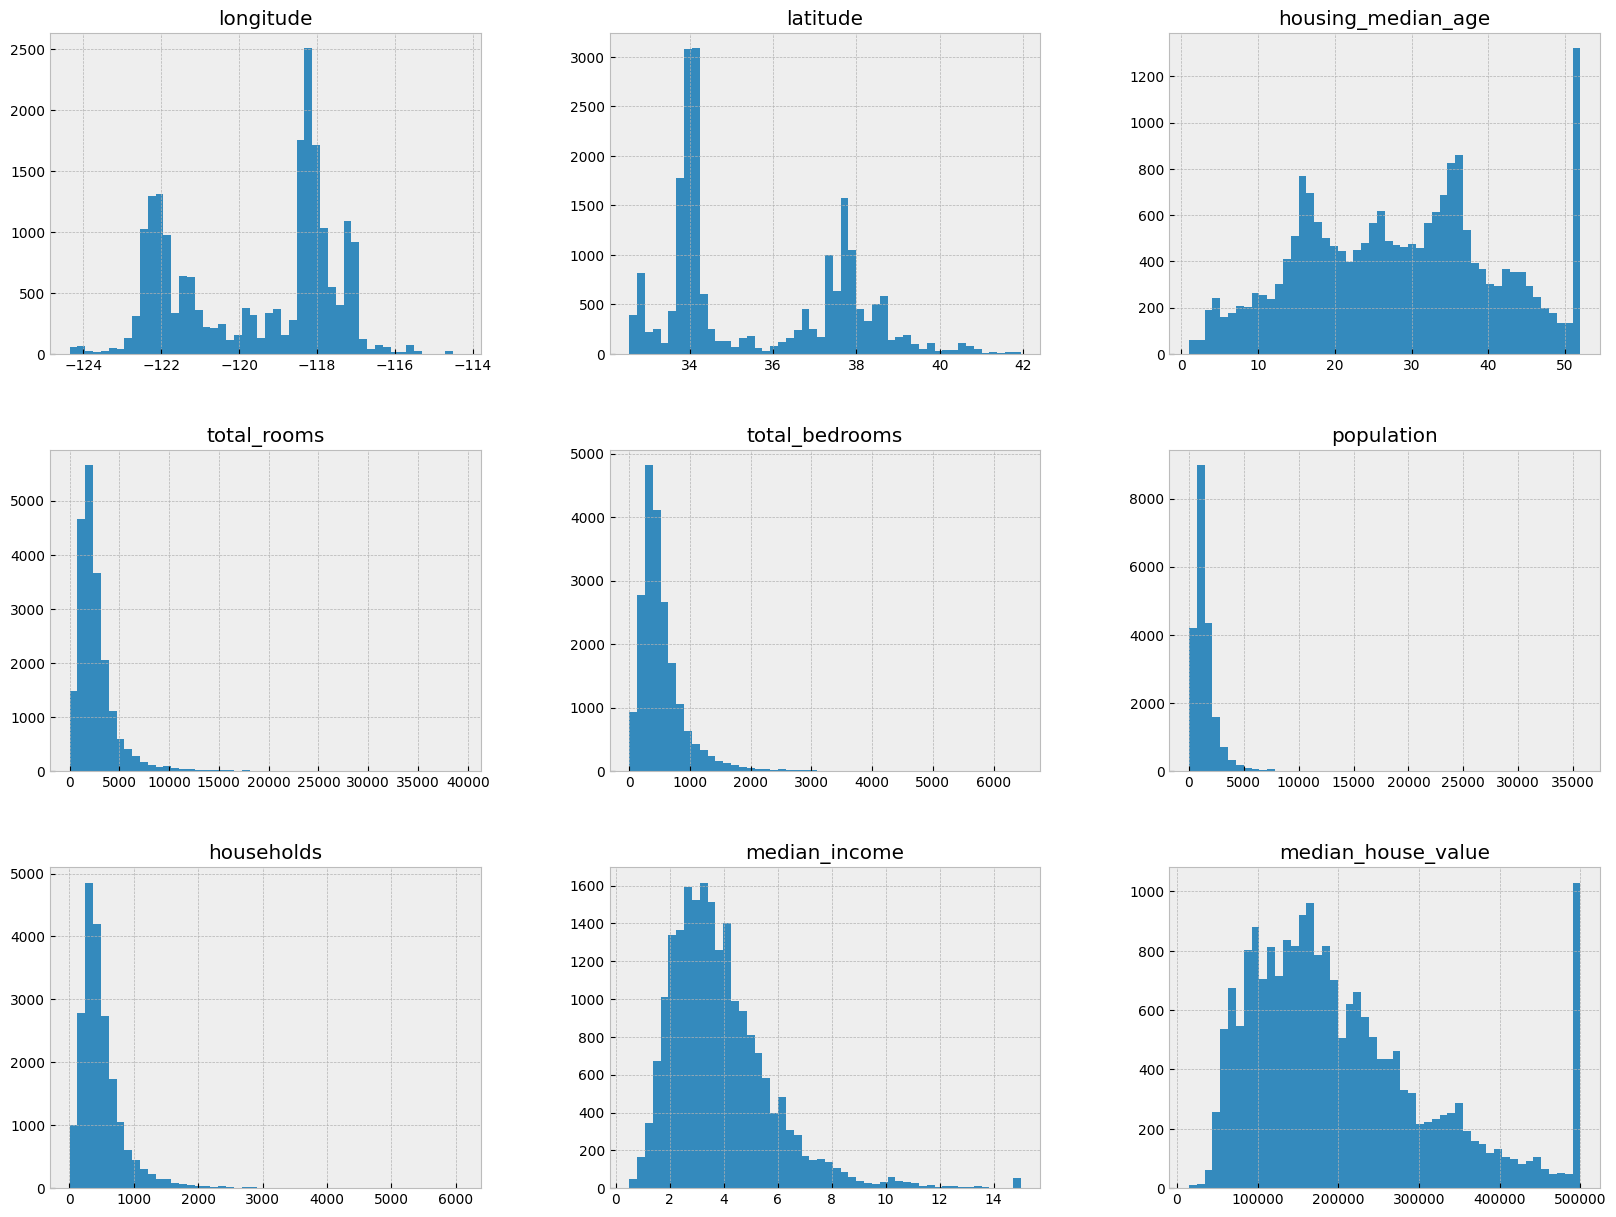

In [11]:
housing.hist(bins=50, figsize=(20,15));

# here bins is equal intervals



<Axes: >

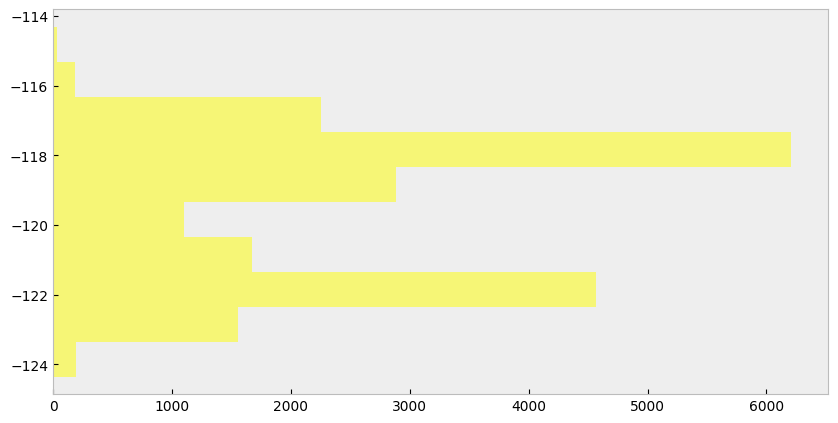

In [12]:
from cProfile import label


housing["longitude"].hist(figsize=(10,5), orientation="horizontal", color="yellow", alpha=0.5, grid=False)
# housing["longitude"].hist()

Observations:

1. First, the ```median_income``` attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $\$ 30,000$). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

2. The ```housing_median_age``` and the ```median_house_value``` were also capped. The latter may be a serious problem since it is your target attribute (your labels). Solutions include:
    1. Collect proper labels for the districts whose those labels were capped.
    2. Remove those districts from the training dataset. This will avoid biasing your system into *thinking* prices cannot go beyond $\$ 500,000$.
    
3. All attributes have very different scales.

4. Many attributes have tail-heavy distributions. This may pose a challenge and we will see later how to transform them close to bell-shaped distributions.

### Geographical Data

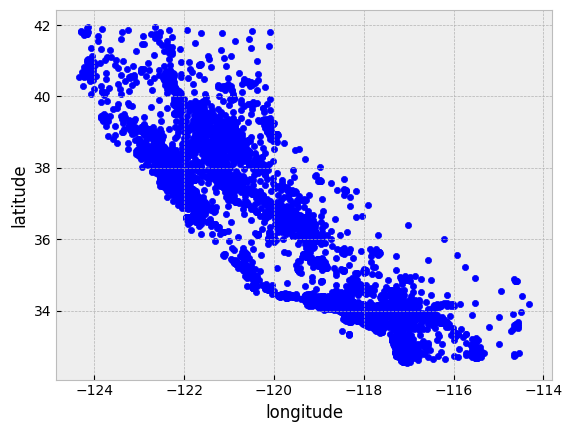

In [13]:
housing.plot(kind='scatter', x='longitude', y='latitude');

Although the plot looks like California, it doesn't make it justice when highlighting more dense areas. Let's modify the transparency of each point to help with that:

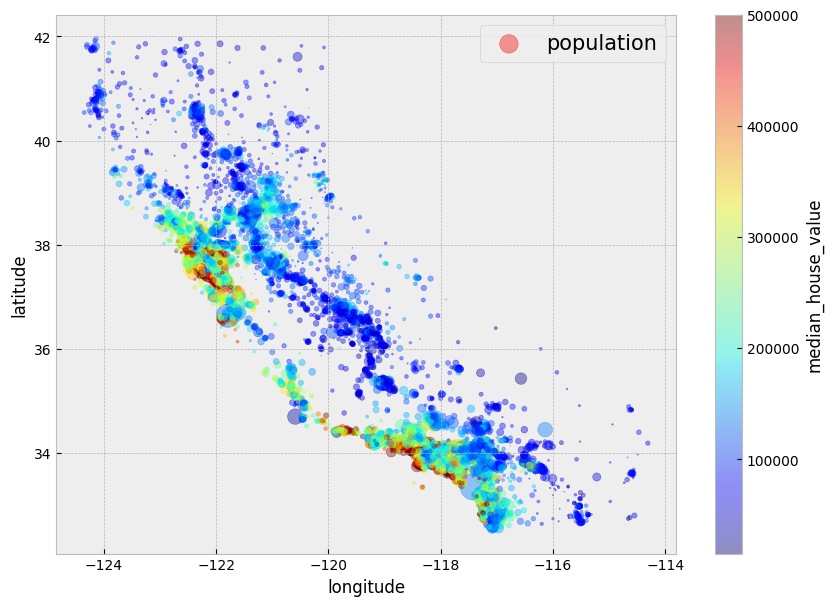

In [14]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.cm.jet, colorbar=True);
plt.legend(fontsize=15);

Now that's much better: you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

# Lecture 2 - Data Visualization, Exploratory Data Analysis & Stratified Train-Test Split for Supervised Learning

---

# End-to-End Machine Learning Project

When training machine learning algorithms, it is important that we do not forget about the goal of the project and how will the algorithm be used in practice. The application will almost always drive the algorithm design and choices made during all steps in a machine learning systems. These include: data collection, model design, performance metrics, hyperparameter tuning, deployment and maintenance.

The main steps you will go through in this course and your projects are: 

1. Look at the big picture. 
2. Get the data. 
3. Discover and visualize the data to gain insights. 
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.

# California District's Median Housing Price

Your task is to use California census data to build a model of housing prices in the state. 

This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will call them "districts" for short. 

Your model should learn from this data and be able to **predict the median housing price in any district, given all the other metrics**.

---

# Supervised Learning

<div class="alert alert-info" role="alert">
  <strong>Supervised Learning</strong>
    
Learning a mapping from input data to desired output values given labeled training data.
</div>

Supervised Learning performs 2 different types of tasks: 
1. Classification. The desired output values are categorical (binary or multi-class, e.g. cat vs dog).
2. Regression. The desired output values are continuous (e.g. median house prices).

---

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import pandas as pd

housing = pd.read_csv('housing.csv')

## Data Visualization

The exploratory data analysis step preceding data cleaning and ML pipelines is extremely valuable in building insights and relationships amongst attributes and the dependent variable.

A histogram is a good choice for numerical attributes. It shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the ```hist()``` method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute:

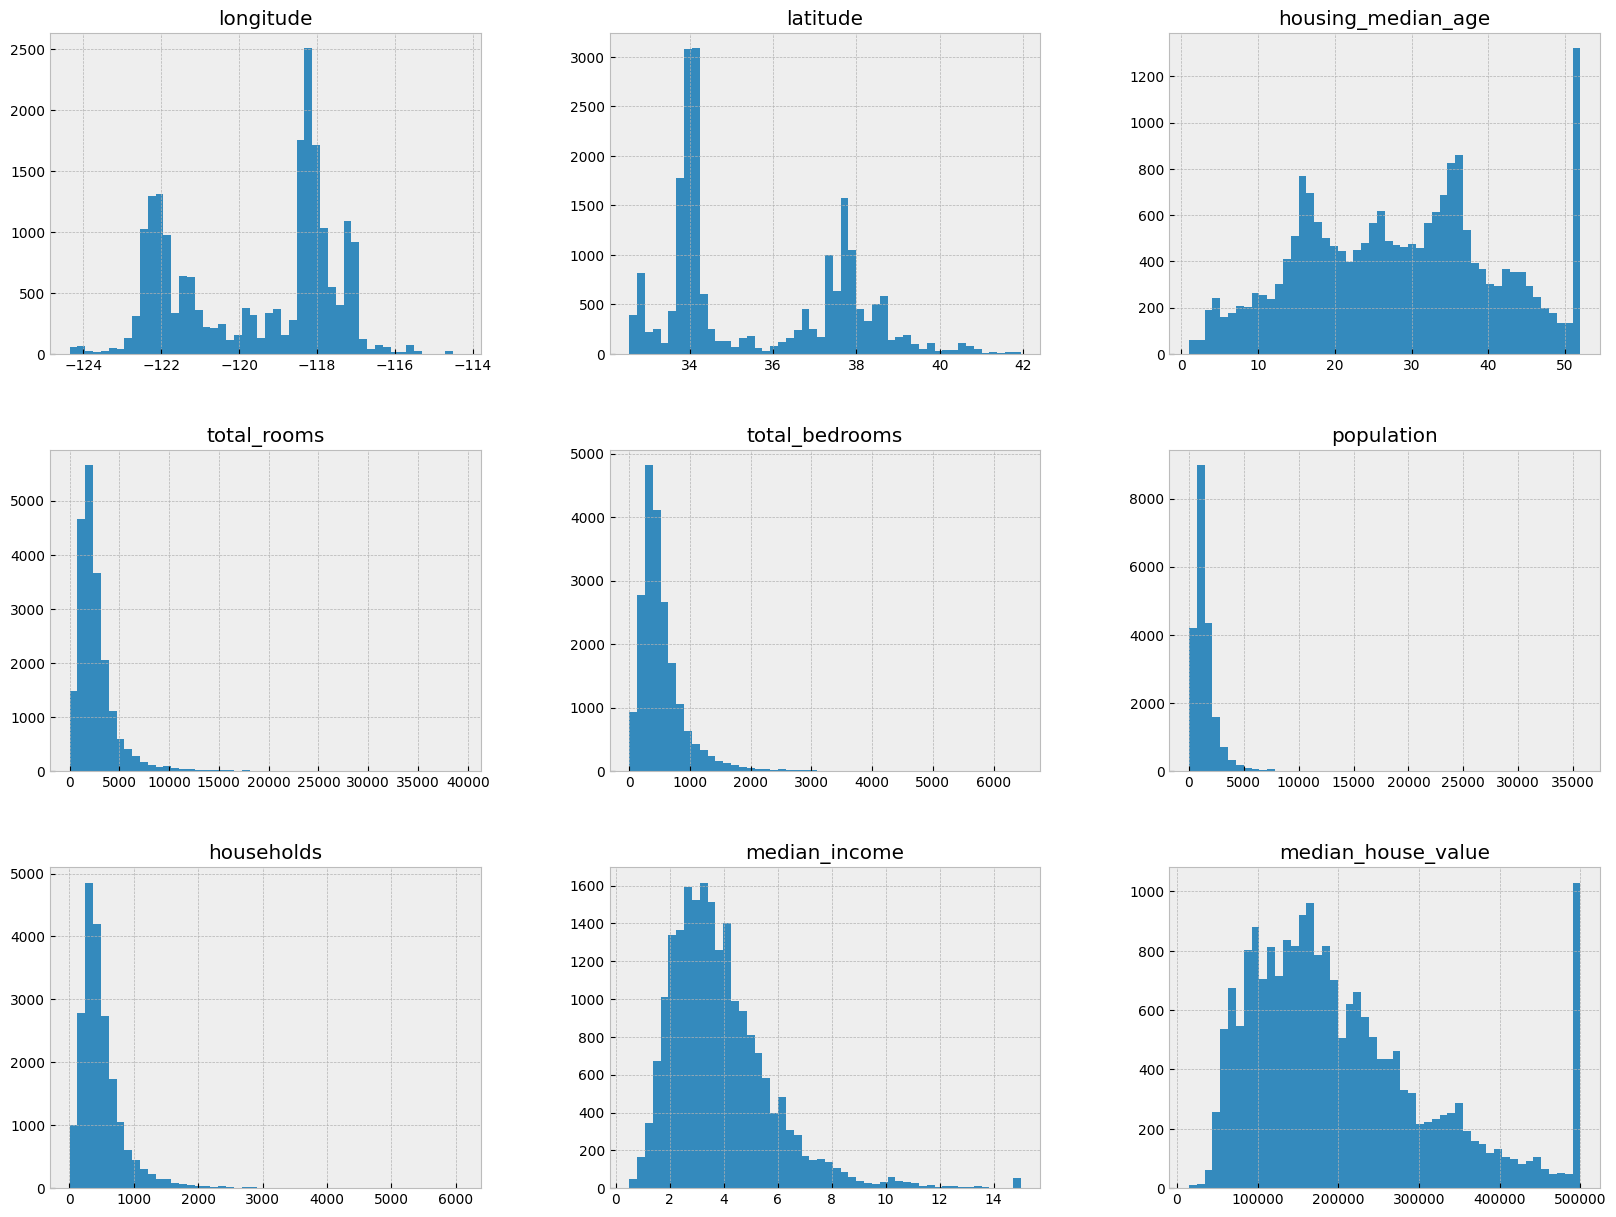

In [16]:
housing.hist(bins=50,figsize=(20,15));

Observations:

1. First, the ```median_income``` attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $\$ 30,000$). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

2. The ```housing_median_age``` and the ```median_house_value``` were also capped. The latter may be a serious problem since it is your target attribute (your labels). Solutions include:
    1. Collect proper labels for the districts whose those labels were capped.
    2. Remove those districts from the training dataset. This will avoid biasing your system into *thinking* prices cannot go beyond $\$ 500,000$.
    
3. All attributes have very different scales.

4. Many attributes have tail-heavy distributions. This may pose a challenge and we will see later how to transform them close to bell-shaped distributions.

### Geographical Data

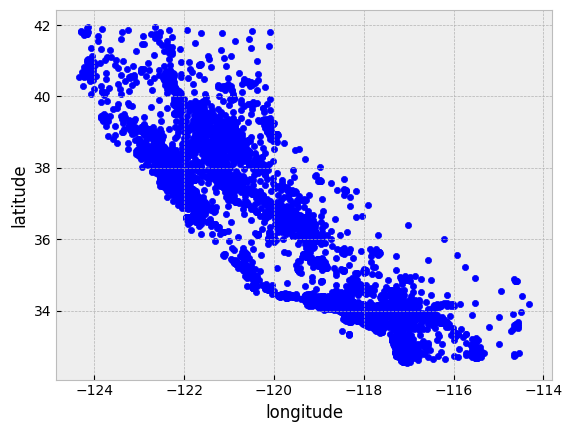

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude');

Although the plot looks like California, it doesn't make it justice when highlighting more dense areas. Let's modify the transparency of each point to help with that:

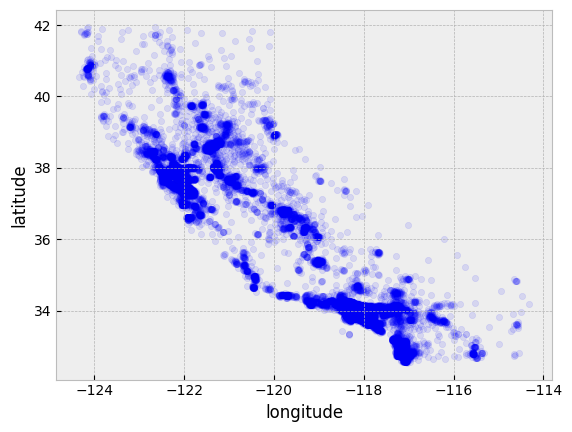

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

Now that's much better: you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

Now let's add housing prices.

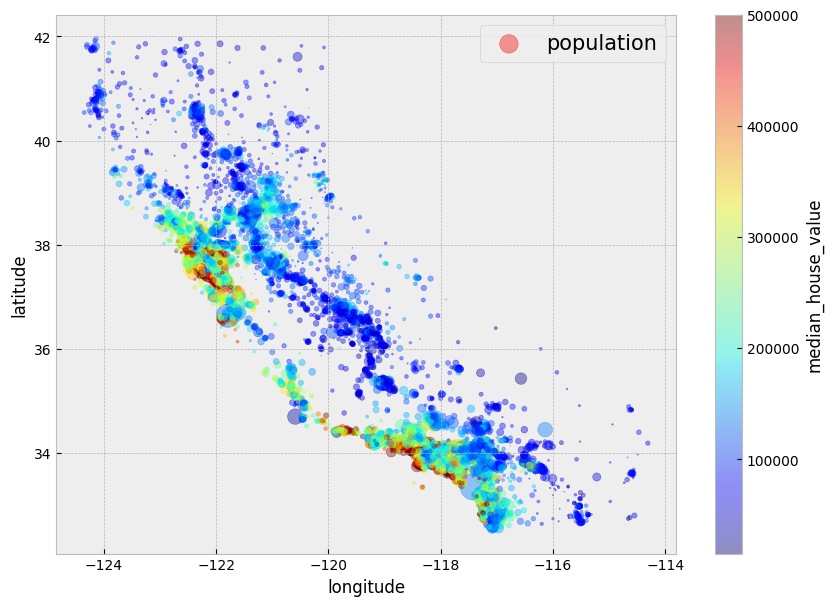

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.cm.jet, colorbar=True)
plt.legend(fontsize=15);

### Correlations

We can compute the (linear) Pearson's correlation coefficient between pairs of attributes with the method ```corr()```:

pearson - linear data | 
spearman - non-linear data (random forest, decision trees)

In [20]:
corr_matrix = housing.corr(method='pearson', numeric_only=True)

corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

Let's check which attribute has the largest correlation with the dependent attributes (the labels):

In [21]:
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

Another way to check for function, ```scatter_matrix()``` correlation between attributes is to use the pandas which plots every numerical attribute against every other numerical attribute:

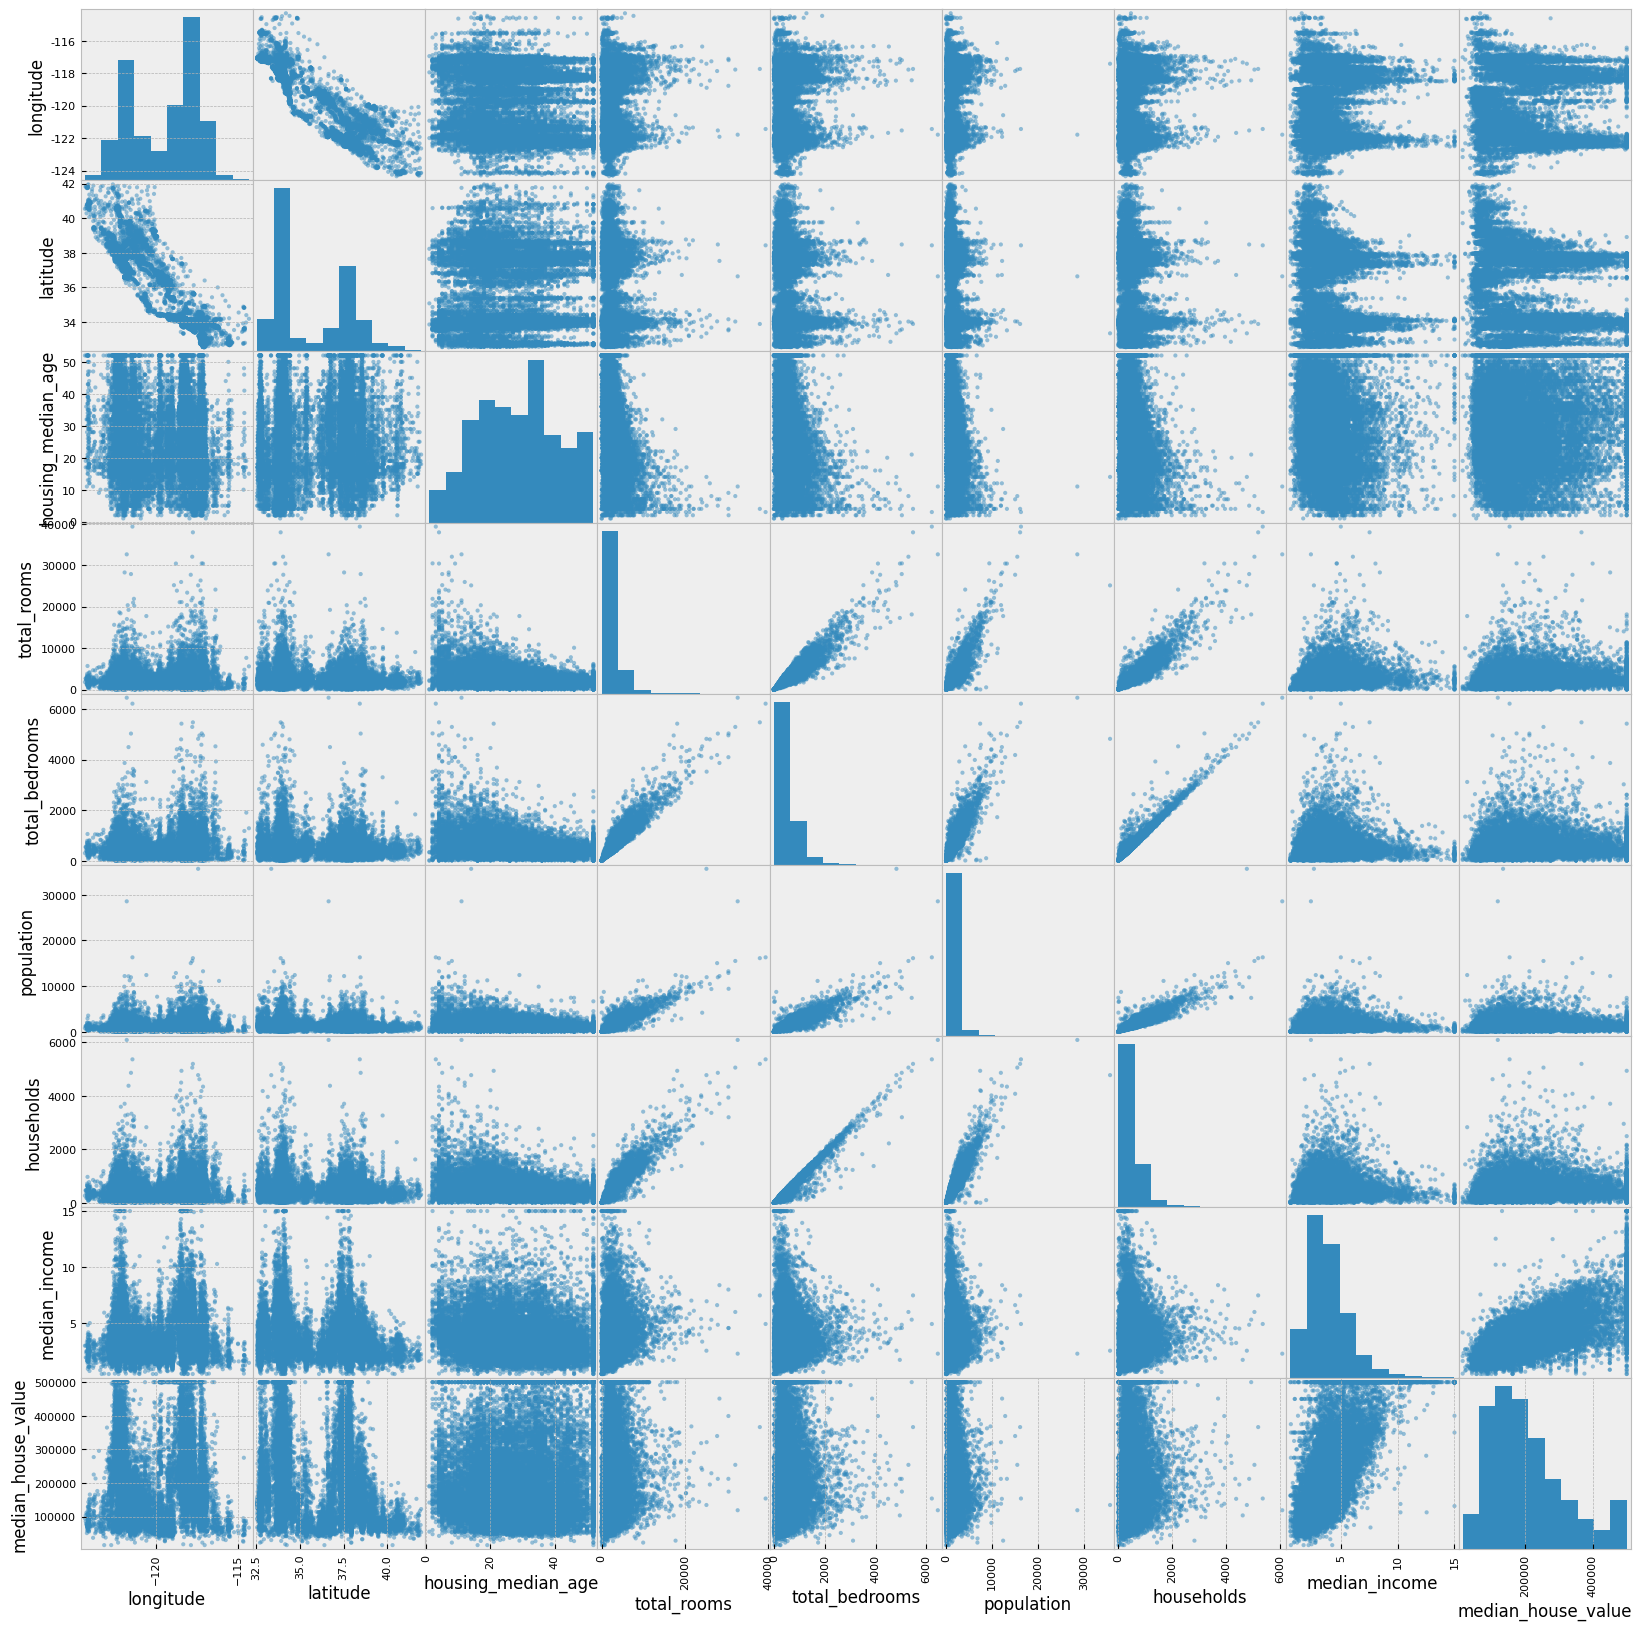

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing, figsize=(20,20));

The most promising attribute to predict the median house value is the ```median_income```, so let's zoom in on their correlation scatterplot.

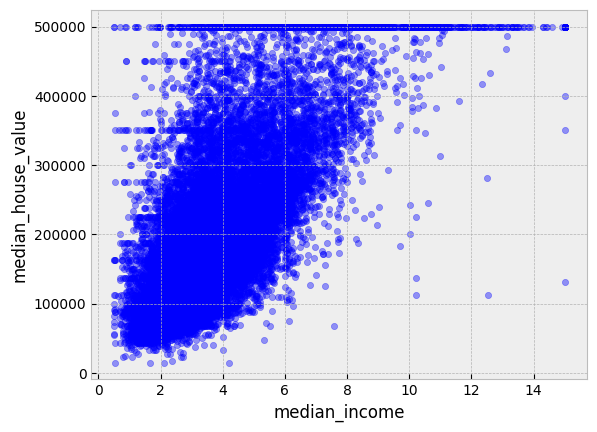

In [23]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.4);

Instead of working with ```pandas``` datframes, you can cast it first to a ```numpy``` array and then use appropriate indexing to access the corresponding column:

In [24]:
housing_np = housing.to_numpy()

housing_np.shape

(20640, 10)

In [25]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

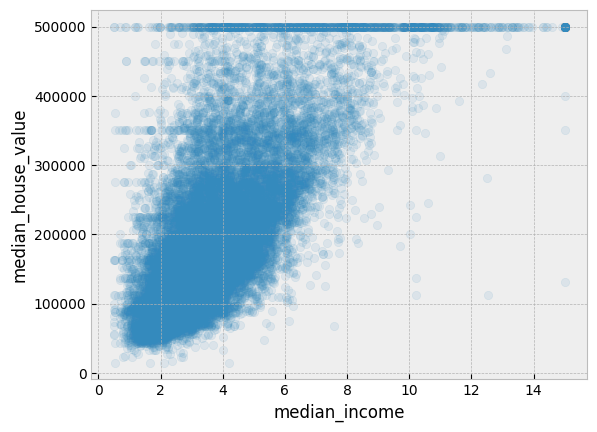

In [95]:
plt.scatter(housing_np[:,-3], housing_np[:,-2], alpha=0.1)
plt.xlabel('median_income')
plt.ylabel('median_house_value');

## Attribute Combination

One last thing you may want to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don't know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let's create these new attributes:

In [27]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households'] 
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms'] 
housing['population_per_household']=housing['population']/housing['households'] 

In [28]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
0            NEAR BAY             6.984127           0.146591   
1            NEAR BAY             6.238137           0.155797   
2            NEAR BAY             8.288136           0.129516   
3            NEAR BAY             5.817352           0.184458   
4            NEAR BAY             6.281853           0.172096   
...               ...                  ...                ...   
20635          INLAND             5.045455           0.224625   
20636          INLAND             6.114035           0.215208   
20637          INLAND             5.205543           0.215173   
20638          INLAND             5.329513           0.219892   
20639          INLAND             5.254717           0.221185   

       population_per_household  
0                      2.555556  
1                      2.109842  
2                      2.802260  
3                      2.547945  
4                      2.181467  
...                         ...  
20635                  2.560606  
20636                  3.122807  
20637                  2.325635  
20638                  2.123209  
20639                  2.616981  

[20640 rows x 13 columns]

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


Now let's look at the correlation matrix again:

In [30]:
corr_matrix= housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=True)

bedrooms_per_room          -0.255880
latitude                   -0.144160
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049686
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
rooms_per_household         0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

Observations:
    
1. The new feature ```bedrooms_per_room``` is much more correlated with the median house value than the total number of rooms or bedrooms. Since the correlation is negative, this means that houses with a lower bedroom/room ratio tend to be more expensive.

2. The number of rooms per household is also more informative than the total number of rooms - obviously, the larger the houses, the more expensive they are.

## Test Set

Before carrying *experimental design* choices such as model selection and fine-tuning the model, it is important that we create a dataset where we can test the model's **generalization** ability. This is often done by allocating a subset of the samples as a **test set**.

The role of the test set is to evaluate the model's performance and generalization. It should not be used *at all* during the training phase in order to avoid the *data snooping bias* that often happens.

We typically partition the data *at random* into **train set** and **test set**. Typically splits are 80/20%.

In [32]:
def split_train_test(data, test_ratio): 
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [33]:
train_set, test_set = split_train_test(housing, 0.2)

In [34]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4988     -121.77     36.71                18.0       6601.0          1395.0   
12836    -118.40     34.14                52.0       1695.0           281.0   
17496    -122.45     37.67                36.0       1664.0           326.0   
14242    -118.42     37.35                21.0       3302.0           557.0   
14357    -118.10     34.10                34.0       2578.0           645.0   
...          ...       ...                 ...          ...             ...   
7322     -118.52     34.22                21.0       4617.0          1101.0   
473      -117.88     34.14                32.0       1764.0           365.0   
19172    -121.09     37.33                40.0        524.0           112.0   
4119     -117.20     33.24                12.0       4992.0             NaN   
6200     -118.47     33.99                50.0       1568.0           501.0   

       population  households  median_income  median_house_value  \
4988       3562.0      1299.0         3.5120            174800.0   
12836       595.0       264.0         6.0678            399300.0   
17496       963.0       322.0         4.7813            246400.0   
14242      1413.0       520.0         4.3750            180400.0   
14357      1628.0       617.0         2.3400            210900.0   
...           ...         ...            ...                 ...   
7322       2891.0      1031.0         3.2289            318100.0   
473         924.0       329.0         3.8750            186700.0   
19172       329.0        96.0         1.7188            112500.0   
4119       2106.0       801.0         6.2079            307300.0   
6200        764.0       478.0         3.0150            414300.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
4988        <1H OCEAN             5.081601           0.211332   
12836       <1H OCEAN             6.420455           0.165782   
17496      NEAR OCEAN             5.167702           0.195913   
14242          INLAND             6.350000           0.168686   
14357       <1H OCEAN             4.178282           0.250194   
...               ...                  ...                ...   
7322        <1H OCEAN             4.478177           0.238467   
473            INLAND             5.361702           0.206916   
19172          INLAND             5.458333           0.213740   
4119        <1H OCEAN             6.232210                NaN   
6200        <1H OCEAN             3.280335           0.319515   

       population_per_household  
4988                   2.742109  
12836                  2.253788  
17496                  2.990683  
14242                  2.717308  
14357                  2.638574  
...                         ...  
7322                   2.804074  
473                    2.808511  
19172                  3.427083  
4119                   2.629213  
6200                   1.598326  

[16512 rows x 13 columns]

In [35]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20271    -121.13     36.21                34.0       2504.0           550.0   
17239    -118.23     34.18                43.0       1708.0           280.0   
19558    -121.35     38.00                 6.0       1649.0           369.0   
15274    -119.66     34.43                27.0       5509.0          1059.0   
6872     -118.06     33.98                50.0       1146.0           238.0   
...          ...       ...                 ...          ...             ...   
937      -121.79     37.31                22.0       2199.0           361.0   
7751     -122.75     38.46                16.0       2653.0           606.0   
17896    -117.32     34.10                27.0       2053.0           461.0   
6272     -122.01     38.26                12.0       4132.0           710.0   
14735    -118.11     34.04                28.0       3913.0           696.0   

       population  households  median_income  median_house_value  \
20271      1810.0       547.0         3.4821            113700.0   
17239       768.0       276.0         6.2070            457400.0   
19558       732.0       350.0         3.4231            123800.0   
15274      2591.0       979.0         3.8456            500001.0   
6872        579.0       213.0         2.9583            172600.0   
...           ...         ...            ...                 ...   
937        1270.0       386.0         5.1149            235700.0   
7751       1693.0       586.0         2.6384            146900.0   
17896      1737.0       463.0         3.1213             78800.0   
6272       2087.0       633.0         4.5987            139700.0   
14735      2264.0       697.0         5.2446            258000.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
20271       <1H OCEAN             4.577697           0.219649   
17239       <1H OCEAN             6.188406           0.163934   
19558          INLAND             4.711429           0.223772   
15274       <1H OCEAN             5.627171           0.192231   
6872        <1H OCEAN             5.380282           0.207679   
...               ...                  ...                ...   
937         <1H OCEAN             5.696891           0.164166   
7751        <1H OCEAN             4.527304           0.228421   
17896          INLAND             4.434125           0.224549   
6272           INLAND             6.527646           0.171830   
14735       <1H OCEAN             5.614060           0.177869   

       population_per_household  
20271                  3.308958  
17239                  2.782609  
19558                  2.091429  
15274                  2.646578  
6872                   2.718310  
...                         ...  
937                    3.290155  
7751                   2.889078  
17896                  3.751620  
6272                   3.296998  
14735                  3.248207  

[4128 rows x 13 columns]

* If you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which is what you want to avoid.

    * One solution is to fix the random number generator, or load a predefined train and test sets.

* But if your dataset is being periodically updated, the solution above will not work.

    * Better solution is to use a **sample identifier** and for each new sample determine whether it should go to the train set or test set.
    
    * When using ```pandas``` dataframes, we can use the dataframe index as the sample identifier.

```Scikit-Learn``` provides a few functions to split datasets into multiple subsets in various ways. The simplest function is ```train_test_split()```, which does pretty much the same thing as the function ```split_train_test()```, with a couple of additional features. 

* It includes a ```random_state``` parameter that allows you to set the random generator seed. 

* You can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate ```DataFrame``` for labels).

In [36]:
from sklearn.model_selection import train_test_split

train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [37]:
train_set, test_set = train_test_split(housing,
                                      test_size=0.2,
                                      shuffle=True,
                                      random_state=42)

In [38]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.22     32.75                34.0       6001.0          1111.0   
8267     -117.03     32.69                10.0        901.0           163.0   
17445    -122.27     37.74                28.0       6909.0          1554.0   
14265    -121.82     37.25                25.0       4021.0           634.0   
2271     -115.98     33.32                 8.0        240.0            46.0   
...          ...       ...                 ...          ...             ...   
11284    -122.37     37.94                49.0        969.0           229.0   
11964    -118.38     33.89                35.0       1778.0           330.0   
5390     -119.33     36.28                16.0       2624.0           527.0   
860      -117.19     34.08                22.0       2467.0           555.0   
15795    -118.86     34.22                22.0       1230.0           200.0   

       population  households  median_income  median_house_value  \
14196      2654.0      1072.0         4.5878            291000.0   
8267        698.0       167.0         4.6648            156100.0   
17445      2974.0      1484.0         3.6875            353900.0   
14265      2178.0       650.0         5.1663            241200.0   
2271         63.0        24.0         1.4688             53800.0   
...           ...         ...            ...                 ...   
11284       599.0       195.0         1.3167             71600.0   
11964       732.0       312.0         6.5745            379300.0   
5390       1077.0       520.0         2.1250            104200.0   
860        1567.0       494.0         2.6536             84700.0   
15795       673.0       195.0         6.2708            251400.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
14196      NEAR OCEAN             5.597948           0.185136   
8267       NEAR OCEAN             5.395210           0.180910   
17445        NEAR BAY             4.655660           0.224924   
14265       <1H OCEAN             6.186154           0.157672   
2271           INLAND            10.000000           0.191667   
...               ...                  ...                ...   
11284        NEAR BAY             4.969231           0.236326   
11964       <1H OCEAN             5.698718           0.185602   
5390           INLAND             5.046154           0.200838   
860            INLAND             4.993927           0.224970   
15795       <1H OCEAN             6.307692           0.162602   

       population_per_household  
14196                  2.475746  
8267                   4.179641  
17445                  2.004043  
14265                  3.350769  
2271                   2.625000  
...                         ...  
11284                  3.071795  
11964                  2.346154  
5390                   2.071154  
860                    3.172065  
15795                  3.451282  

[16512 rows x 13 columns]

In [39]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -122.38     40.67                10.0       2281.0           444.0   
3024     -118.37     33.83                35.0       1207.0           207.0   
15663    -117.24     32.72                39.0       3089.0           431.0   
20484    -118.44     34.05                18.0       4780.0          1192.0   
9814     -118.44     34.18                33.0       2127.0           414.0   
...          ...       ...                 ...          ...             ...   
15362    -121.92     40.52                13.0       4581.0           881.0   
16623    -122.08     37.68                26.0       2607.0           682.0   
18086    -119.00     35.39                42.0       2839.0           516.0   
2144     -117.92     33.63                39.0       1469.0           226.0   
3665     -118.39     34.02                38.0       2447.0           636.0   

       population  households  median_income  median_house_value  \
20046      1274.0       438.0         2.2120             65600.0   
3024        601.0       213.0         4.7308            353400.0   
15663      1175.0       432.0         7.5925            466700.0   
20484      1886.0      1036.0         4.4674            500001.0   
9814       1056.0       391.0         4.3750            286100.0   
...           ...         ...            ...                 ...   
15362      1799.0       734.0         2.2993             99500.0   
16623      1401.0       607.0         2.6563            184100.0   
18086      1203.0       487.0         3.7708             79400.0   
2144        553.0       225.0         7.8496            490800.0   
3665       1312.0       574.0         3.5909            279400.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
20046          INLAND             5.207763           0.194651   
3024        <1H OCEAN             5.666667           0.171500   
15663      NEAR OCEAN             7.150463           0.139527   
20484       <1H OCEAN             4.613900           0.249372   
9814        <1H OCEAN             5.439898           0.194640   
...               ...                  ...                ...   
15362          INLAND             6.241144           0.192316   
16623        NEAR BAY             4.294893           0.261603   
18086          INLAND             5.829569           0.181754   
2144        <1H OCEAN             6.528889           0.153846   
3665        <1H OCEAN             4.263066           0.259910   

       population_per_household  
20046                  2.908676  
3024                   2.821596  
15663                  2.719907  
20484                  1.820463  
9814                   2.700767  
...                         ...  
15362                  2.450954  
16623                  2.308072  
18086                  2.470226  
2144                   2.457778  
3665                   2.285714  

[4128 rows x 13 columns]

From the previous correlation results, we saw that median income has a moderate predictive value to predict the median house price:

Since this **feature** (or **attribute**) is so valuable, we may want to maintain the prior probabilities of each "category" of median income in the train and test sets.

<div class="alert alert-info" role="alert">
    <b>Stratification</b>
    
Process of partitioning the dataset into subsets while preserving the (categorical) classes prior probabilities the same as in the original dataset. 
    
For example, if a class has 20 percent examples in the whole dataset, in all samples drawn from the dataset, it should also have approximately 20 percent examples in each subset.
</div>

Let's visualize the feature ```median_income``` to gain more insights:

In [40]:
corr_matrix['median_house_value'].sort_values(ascending=True)

bedrooms_per_room          -0.255880
latitude                   -0.144160
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049686
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
rooms_per_household         0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

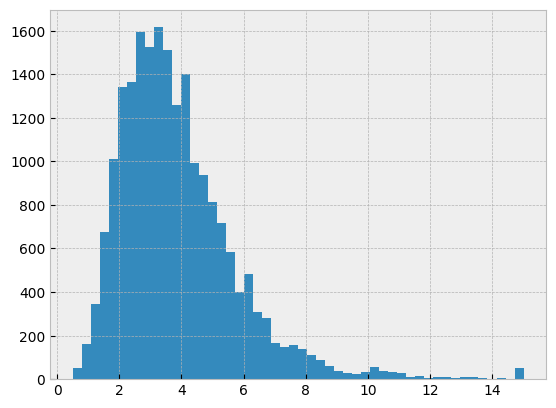

In [41]:
housing['median_income'].hist(bins=50);

To be continued next lecture.

---

# Next Lecture... Prepare the Data for Machine Learning Algorithms

In preparing your data for ML algorithms it is often convenient and efficient to build functions to automate feature extraction and data cleaning. This provides with:

* reproducibility on any dataset,
* reusability,
* apply the same transformations to the test set,
* ability to incorporate it with your live system, and
* carry experiments for design choices.

These transformations can be applied to the features only, the target values only or both.

# Lecture 3 - Data Cleaning, Data Encoding & Transformation Pipelines

---

# End-to-End Machine Learning Project

When training machine learning algorithms, it is important that we do not forget about the goal of the project and how will the algorithm be used in practice. The application will almost always drive the algorithm design and choices made during all steps in a machine learning systems. These include: data collection, model design, performance metrics, hyperparameter tuning, deployment and maintenance.

The main steps you will go through in this course and your projects are: 

1. ~~Look at the big picture.~~
2. ~~Get the data.~~
3. ~~Discover and visualize the data to gain insights.~~
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import pandas as pd
from sklearn.model_selection import train_test_split

housing = pd.read_csv('housing.csv')

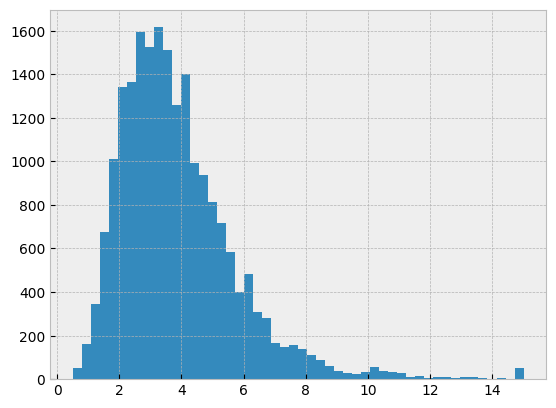

In [43]:
housing['median_income'].hist(bins=50);

In [44]:
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [99]:
income_cat = pd.cut(housing['median_income'],
                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                   labels=[1, 2, 3, 4, 5])

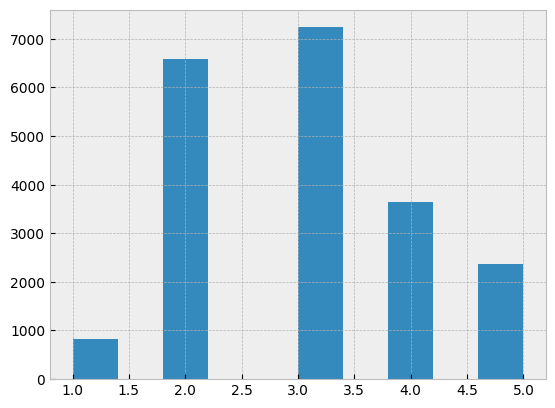

In [100]:
plt.hist(income_cat);

In [47]:
train_set, test_set, income_cat_train, income_cat_test = train_test_split(housing,income_cat,
                                                                         test_size=0.2,
                                                                         stratify=income_cat,
                                                                         random_state=42,
                                                                         shuffle=True)

In [48]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   
...           ...         ...            ...                 ...   
14207       938.0       523.0         4.7105            500001.0   
13105      1419.0       532.0         2.5733             88800.0   
19301      2814.0       760.0         4.0616            148800.0   
19121      1725.0       838.0         4.1455            500001.0   
19888       682.0       212.0         3.2833            233300.0   

      ocean_proximity  
13096        NEAR BAY  
14973       <1H OCEAN  
3785           INLAND  
14689          INLAND  
20507      NEAR OCEAN  
...               ...  
14207       <1H OCEAN  
13105          INLAND  
19301      NEAR OCEAN  
19121       <1H OCEAN  
19888      NEAR OCEAN  

[16512 rows x 10 columns]

In [49]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3905     -121.95     37.11                21.0       2387.0           357.0   
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   
...          ...       ...                 ...          ...             ...   
12369    -124.16     40.79                46.0       3042.0           597.0   
8707     -119.01     35.39                29.0       1820.0           459.0   
16634    -123.01     38.67                33.0        914.0           147.0   
9779     -122.03     37.60                24.0       2077.0           383.0   
3455     -117.12     32.74                52.0       1969.0           389.0   

       population  households  median_income  median_house_value  \
3905        913.0       341.0         7.7360            397700.0   
16821       804.0       272.0         4.6354            202900.0   
2900       2136.0      1503.0         4.0968            310000.0   
7193       1072.0       370.0         4.1310            314300.0   
13928       725.0       392.0         3.6037            187500.0   
...           ...         ...            ...                 ...   
12369      1206.0       541.0         2.1135             90600.0   
8707       1134.0       419.0         1.8289             59400.0   
16634       394.0       132.0         4.6875            246200.0   
9779       1488.0       389.0         4.5721            214700.0   
3455        877.0       424.0         3.7900            163400.0   

      ocean_proximity  
3905        <1H OCEAN  
16821       <1H OCEAN  
2900       NEAR OCEAN  
7193       NEAR OCEAN  
13928        NEAR BAY  
...               ...  
12369      NEAR OCEAN  
8707           INLAND  
16634       <1H OCEAN  
9779         NEAR BAY  
3455       NEAR OCEAN  

[4128 rows x 10 columns]

In [50]:
income_cat_train

13096    2
14973    5
3785     2
14689    2
20507    3
        ..
14207    4
13105    2
19301    3
19121    3
19888    3
Name: median_income, Length: 16512, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [51]:
income_cat_test

3905     5
16821    4
2900     3
7193     3
13928    3
        ..
12369    2
8707     2
16634    4
9779     4
3455     3
Name: median_income, Length: 4128, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

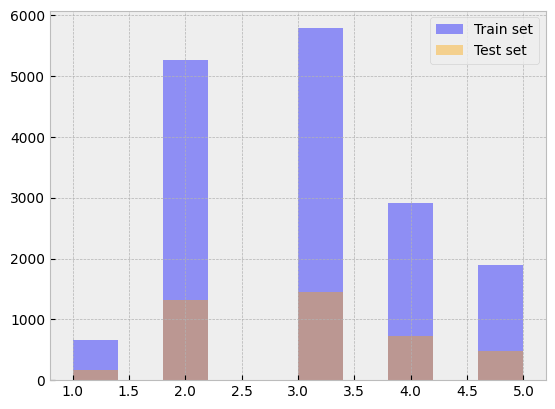

In [52]:
plt.hist(income_cat_train, color='blue', label='Train set', alpha=0.4)
plt.hist(income_cat_test, color='orange', label='Test set', alpha=0.4)
plt.legend();

In [53]:
t_train = train_set['median_house_value'].copy()
X_train = train_set.drop(labels='median_house_value', axis=1)

t_train.shape, X_train.shape

((16512,), (16512, 9))

In [54]:
t_test = test_set['median_house_value'].copy()
X_test = test_set.drop(labels='median_house_value', axis=1)

t_test.shape, X_test.shape

((4128,), (4128, 9))

# Step 4: Prepare the data for Machine Learning algorithms

## Data Cleaning

In case features have some missing values, you have three options to proceed: 

1. Get rid of the corresponding sample. 

2. Get rid of the whole feature. 

3. Set the values to some value (zero, the mean, the median, etc.). 

```pandas``` dataframes have readily available methods to accomplish this: ```dropna()```, ```drop()```, and ```fillna()```.

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [56]:
# option 1: drops rows with non-a-number entries in "total_bedrooms"
# X_train.dropna(subset=['total_bedrooms'])

# option 2: drop the attribute/column called "total_bedrooms"
# X_train.drop('total_bedrooms', axis=1)

# option 3: filling in empty entries with the median statistic
# median = X_train['total_bedrooms'].median()
# X_train['total_bedrooms'].fillna(median, inplace=True)

```scikit-learn``` provides a class to handle missing data: ```SimpleImputer```.

In [57]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(strategy='median')

imputer

SimpleImputer(strategy='median')

Since the median can only be computed on numerical attributes, you need to create a copy of the data without the text feature ```ocean_proximity```:

In [58]:
X_train_num = X_train.drop('ocean_proximity', axis=1)

In [101]:
X_train_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292  
...           ...         ...            ...  
14207       938.0       523.0         4.7105  
13105      1419.0       532.0         2.5733  
19301      2814.0       760.0         4.0616  
19121      1725.0       838.0         4.1455  
19888       682.0       212.0         3.2833  

[16512 rows x 8 columns]

In [59]:
imputer.fit(X_train_num)

# "fit" method is learning the median value

SimpleImputer(strategy='median')

In ```scikit-learn```, all the estimator's hyperparameters are accessible directly via public instance variables (e.g., ```imputer.strategy```), and all the estimator's learned parameters are accessible via public instance variables with an underscore suffix (e.g., ```imputer.statistics_```).

In [60]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [61]:
X_train_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2125.0000
total_bedrooms         434.0000
population            1167.0000
households             408.0000
median_income            3.5385
dtype: float64

In [62]:
X=imputer.transform(X_train_num)

# the output of scikit-learn are numpy arrays, not pandas arrays

In [102]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [63]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16512 non-null  float64
 1   1       16512 non-null  float64
 2   2       16512 non-null  float64
 3   3       16512 non-null  float64
 4   4       16512 non-null  float64
 5   5       16512 non-null  float64
 6   6       16512 non-null  float64
 7   7       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


## Handling Text and Categorical Inputs

In [64]:
X_train_cat = housing[['ocean_proximity']]

X_train_cat

ocean_proximity
0            NEAR BAY
1            NEAR BAY
2            NEAR BAY
3            NEAR BAY
4            NEAR BAY
...               ...
20635          INLAND
20636          INLAND
20637          INLAND
20638          INLAND
20639          INLAND

[20640 rows x 1 columns]

Let's convert the categories to numerical representations. There are 2 options:

1. **Integer encoding**. Each category is encoded to a discrete number (1, 2, 3, etc.). The issue with integer encoding is the fact that we will inject an implicit order in the categories (1 < 2, 1 < 3, etc.) that may not reflect the (physical) properties that feature is describing.

2. **One-Hot Encoding**. Each category is encoded as a sparse vector. That vector will have as many entries as there are categories. They will all be zero except at the integer location that category belongs, in which it will have an entry equal to 1. The challenge with one-hot encoding is that these representations can be very sparse and pose challenges later on in the algorithm design and training.

    * **Binary Encoding**. Choose a binary (or other base) encoding to reduce sparsity while not imposing implicit ordering.
    
3. **Representation Learning**. Alternatively, you could replace each category with a learnable, low-dimensional vector called an *embedding*. Each category's representation would be learned during training. We will see this later in the course.

In [65]:
# Option 1

from sklearn.preprocessing import OrdinalEncoder 

# OrdinalEncoder?

In [66]:
ordinal_encoder = OrdinalEncoder()

ordinal_encoder

OrdinalEncoder()

In [67]:
# use "fit" and "transform" function in one go

X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

X_train_cat_encoded


# fit_transform should NEVER be used in test. It is only used during training.
# in test, we use the method TRANSFORM.

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [68]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [69]:
# Option 2

from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder?

In [70]:
cat_encoder = OneHotEncoder()
cat_encoder

OneHotEncoder()

In [71]:
X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)

X_train_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [72]:
X_train_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. 

* Note that scaling the target values is generally **not** required. 

There are two common ways to get all attributes to have the same scale: 

1. **Min-Max Scaling**. Values are shifted and rescaled so that they end up ranging from 0 to 1.
    * Highly affected by outliers.
    

2. **Standardization**. First it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.
    * Less affected by outliers
    * Gaussianity assumptions

<div class="alert alert-warning" role="alert">
    
As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).
</div>

## Transformation Pipelines

In [73]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [74]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('std_scaler', StandardScaler())])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

In [75]:
from sklearn.compose import ColumnTransformer

# ColumnTransformer?

In [103]:
num_attribs = list(X_train_num.columns)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('std_scaler', StandardScaler())])

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                  ('cat', OneHotEncoder(), cat_attribs)])

full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [77]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [78]:
X_train.shape

(16512, 9)

In [79]:
X_train_prepared.shape

(16512, 13)

In [80]:
full_pipeline.named_transformers_.cat.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [81]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [82]:
attribute_labels = np.hstack((num_attribs, full_pipeline.named_transformers_.cat.categories_[0]))

attribute_labels

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [83]:
# Visualizing the data in a dataframe format - not a required step

housing_train_prepared = pd.DataFrame(X_train_prepared, 
                                      columns=attribute_labels,
                                      index=train_set.index)

housing_train_prepared

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -1.423037  1.013606            1.861119     0.311912        1.368167   
14973   0.596394 -0.702103            0.907630    -0.308620       -0.435925   
3785   -1.203098  1.276119            0.351428    -0.712240       -0.760709   
14689   1.231216 -0.884924           -0.919891     0.702262        0.742306   
20507   0.711362 -0.875549            0.589800     0.790125        1.595753   
...          ...       ...                 ...          ...             ...   
14207   0.586397 -0.833359            0.987087    -0.184147        0.140152   
13105   0.131525  0.319822           -0.443146     0.139847        0.128298   
19301   1.256209 -1.428701           -1.237721     0.586026        0.562134   
19121   0.586397 -0.739605            0.669257     0.522417        0.794461   
19888  -1.418038  0.947978            1.225459    -1.010608       -0.812864   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
13096    0.137460    1.394812      -0.936491        0.0     0.0     0.0   
14973   -0.693771   -0.373485       1.171942        1.0     0.0     0.0   
3785    -0.788768   -0.775727      -0.759789        0.0     1.0     0.0   
14689    0.383175    0.731375      -0.850281        0.0     1.0     0.0   
20507    0.444376    1.755263      -0.180365        0.0     0.0     0.0   
...           ...         ...            ...        ...     ...     ...   
14207   -0.445315    0.060101       0.444041        1.0     0.0     0.0   
13105   -0.005950    0.083608      -0.685630        0.0     1.0     0.0   
19301    1.268299    0.679135       0.101049        0.0     0.0     0.0   
19121    0.273563    0.882868       0.145396        1.0     0.0     0.0   
19888   -0.679156   -0.752219      -0.310341        0.0     0.0     0.0   

       NEAR BAY  NEAR OCEAN  
13096       1.0         0.0  
14973       0.0         0.0  
3785        0.0         0.0  
14689       0.0         0.0  
20507       0.0         1.0  
...         ...         ...  
14207       0.0         0.0  
13105       0.0         0.0  
19301       0.0         1.0  
19121       0.0         0.0  
19888       0.0         1.0  

[16512 rows x 13 columns]

In [84]:
X_test_prepared

array([[-1.18810272,  0.69015258, -0.60206127, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78134234, -0.81929623,  0.58980003, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69636628, -0.88961217,  0.11305551, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.71795342,  1.42143834,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22809145,  0.91985131, -0.36368901, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.22621698, -1.35838509,  1.86111875, ...,  0.        ,
         0.        ,  1.        ]])

This is the **feature matrix**, the input data used to train a machine learning model.

In [85]:
# Visualizing the data in a dataframe format - not a required step

housing_test_prepared = pd.DataFrame(X_test_prepared,
                                     columns=attribute_labels,
                                     index=test_set.index)

housing_test_prepared

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3905   -1.188103  0.690153           -0.602061    -0.115504       -0.428813   
16821   0.781342 -0.819296            0.589800    -0.480685       -0.646916   
2900    0.696366 -0.889612            0.113056     1.498977        2.873552   
7193   -1.453028  0.985480            1.861119    -0.216638       -0.272347   
13928  -1.408041  1.004230           -1.873380    -0.564887       -0.054244   
...          ...       ...                 ...          ...             ...   
12369  -2.292791  2.415237            1.384374     0.184236        0.140152   
8707    0.281483 -0.116137            0.033598    -0.374975       -0.187003   
16634  -1.717953  1.421438            0.351428    -0.789578       -0.926657   
9779   -1.228091  0.919851           -0.363689    -0.257367       -0.367175   
3455    1.226217 -1.358385            1.861119    -0.306789       -0.352951   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
3905    -0.468151   -0.415276       2.043245        1.0     0.0     0.0   
16821   -0.567716   -0.595501       0.404345        1.0     0.0     0.0   
2900     0.648987    2.619822       0.119655        0.0     0.0     0.0   
7193    -0.322914   -0.339529       0.137732        0.0     0.0     0.0   
13928   -0.639878   -0.282066      -0.140986        0.0     0.0     0.0   
...           ...         ...            ...        ...     ...     ...   
12369   -0.200513    0.107116      -0.928669        0.0     0.0     0.0   
8707    -0.266281   -0.211543      -1.079101        0.0     1.0     0.0   
16634   -0.942226   -0.961176       0.431884        1.0     0.0     0.0   
9779     0.057077   -0.289902       0.370886        0.0     0.0     0.0   
3455    -0.501035   -0.198483      -0.042512        0.0     0.0     0.0   

       NEAR BAY  NEAR OCEAN  
3905        0.0         0.0  
16821       0.0         0.0  
2900        0.0         1.0  
7193        0.0         1.0  
13928       1.0         0.0  
...         ...         ...  
12369       0.0         1.0  
8707        0.0         0.0  
16634       0.0         0.0  
9779        1.0         0.0  
3455        0.0         1.0  

[4128 rows x 13 columns]

---

# Step 5: Select and Train a Model

Let's start by using a simple **multiple linear regression** where the goal is to predict a single (continuous) outcome using several explanatory attributes/features.

The **mapper** function takes the form:

\begin{align*}
y = w_0 + w_1 f_1 + w_2 f_2 + \dots + w_M + f_M = w_0 + \sum_{i=1}^M w_i f_i
\end{align*}

where $f_i$ is the $i$-th attribute (or feature), $w_i$ the associated weight parameter and $w_0$ corresponds to the bias term in the multiple linear regression model.

In [86]:
# Mapper function = linear regression
# Objective function = Mean Squared Error (MSE)
# Learning Algorithm = Matrix decomposition (SVD)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_prepared, t_train) 

LinearRegression()

In [87]:
# LinearRegression?

In [107]:
lin_reg.coef_, lin_reg.coef_.shape, lin_reg.coef_[:, np.newaxis].shape

(array([-53381.26179264, -54311.55719382,  13122.77377485,  -8357.34824316,
         26159.33889213, -50242.06829496,  37563.32620216,  73068.48598075,
        -39693.52291123, -79379.699018  , 198442.39845272, -43374.75068384,
        -35994.42583964]),
 (13,),
 (13, 1))

- The intercept is the “starting value” of a prediction line.
- It’s what the model predicts when all inputs are zero.

If you set fit_intercept=False , the intercept is forced to 0 .

In [108]:
lin_reg.intercept_

258682.58180082284

- A vector is an ordered list of numbers that represents a quantity with direction and size.
- Think of it like an arrow: where it points is the direction, how long it is is the size.

In [90]:
# concatenating all parameters into vector w

w = np.vstack((lin_reg.intercept_, lin_reg.coef_[:, np.newaxis]))

w

array([[258682.58180082],
       [-53381.26179264],
       [-54311.55719382],
       [ 13122.77377485],
       [ -8357.34824316],
       [ 26159.33889213],
       [-50242.06829496],
       [ 37563.32620216],
       [ 73068.48598075],
       [-39693.52291123],
       [-79379.699018  ],
       [198442.39845272],
       [-43374.75068384],
       [-35994.42583964]])

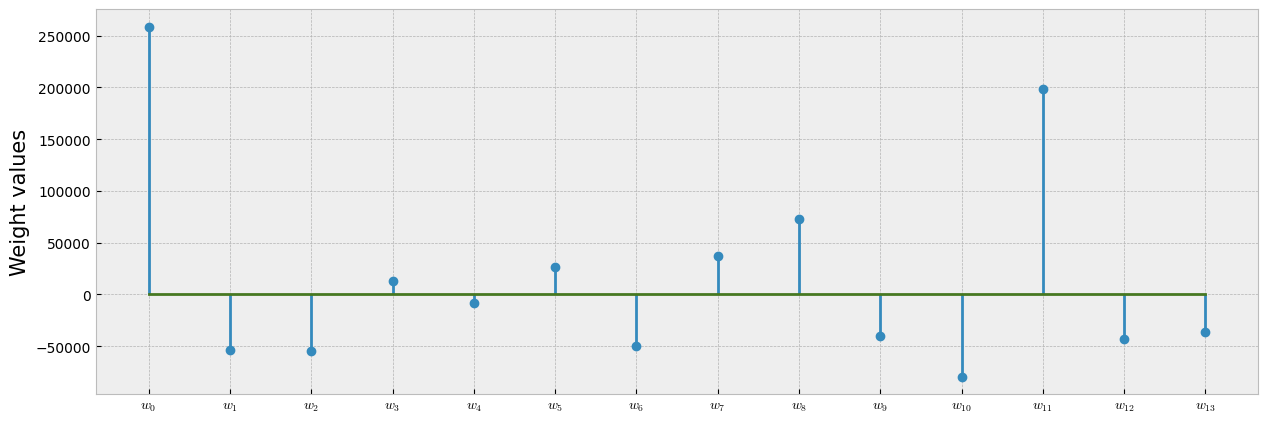

In [91]:
plt.figure(figsize=(15,5))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);

In [92]:
# Making predictions

y_train = lin_reg.predict(X_train_prepared)

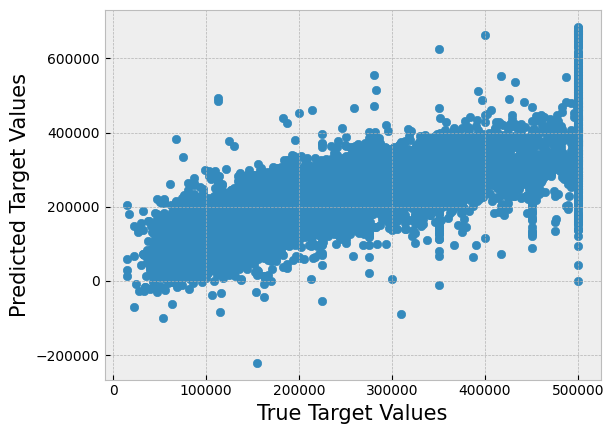

In [93]:
plt.scatter(t_train,y_train)
plt.xlabel('True Target Values', size=15)
plt.ylabel('Predicted Target Values', size=15);

We should summarize this information using quantitative performance measures. Examples include:

* Coefficient of determination ($r^2$) of the quantile-quantile (Q-Q) plot,
* Root Mean Squared Error (RMSE),
* Root Mean Absolute Error (RMAE),
* and others...

### Other Performance Measures - In Practice

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

# Lecture 4 - Linear Regression & Performance Metrics for Regression Tasks

---

# End-to-End Machine Learning Project

The main steps you will go through in this course and your projects are: 

1. ~~Look at the big picture.~~
2. ~~Get the data.~~
3. ~~Discover and visualize the data to gain insights.~~
4. ~~Prepare the data for Machine Learning algorithms.~~
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.

---

# Preparing the Data for ML Algorithms

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

Loading the data:

In [110]:
housing = pd.read_csv('housing.csv')
# Adding new features
housing['rooms_per_household'] = housing['total_rooms']/housing['households'] 
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms'] 
housing['population_per_household']=housing['population']/housing['households']

Partition the data into train and test sets. In this scenario, we are using stratified partition based on the most predictive feature (median income).

In [111]:
income_cat = pd.cut(housing['median_income'], 
                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                    labels=[1, 2, 3, 4, 5])

In [112]:
train_set, test_set, income_cat_train, income_cat_test = train_test_split(housing, income_cat,
                                                                          test_size=0.2,
                                                                          shuffle=True,
                                                                          random_state=42,
                                                                          stratify=income_cat)

Creating variable names for features and target labels in both train and test sets.

In [ ]:
t_train = train_set['median_house_value'].copy()
X_train = train_set.drop(labels='median_house_value', axis=1) #- axis=1 means “work across columns” axis=0 means “work across rows”

t_train.shape, X_train.shape

((16512,), (16512, 12))

In [114]:
t_test = test_set['median_house_value'].copy()
X_test = test_set.drop(labels='median_house_value', axis=1)

t_test.shape, X_test.shape

((4128,), (4128, 12))

Creating a ```scikit-learn``` transformation pipeline to scale and encode numerical and categorical features.

In [116]:
X_train
X_test


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3905     -121.95     37.11                21.0       2387.0           357.0   
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   
...          ...       ...                 ...          ...             ...   
12369    -124.16     40.79                46.0       3042.0           597.0   
8707     -119.01     35.39                29.0       1820.0           459.0   
16634    -123.01     38.67                33.0        914.0           147.0   
9779     -122.03     37.60                24.0       2077.0           383.0   
3455     -117.12     32.74                52.0       1969.0           389.0   

       population  households  median_income ocean_proximity  \
3905        913.0       341.0         7.7360       <1H OCEAN   
16821       804.0       272.0         4.6354       <1H OCEAN   
2900       2136.0      1503.0         4.0968      NEAR OCEAN   
7193       1072.0       370.0         4.1310      NEAR OCEAN   
13928       725.0       392.0         3.6037        NEAR BAY   
...           ...         ...            ...             ...   
12369      1206.0       541.0         2.1135      NEAR OCEAN   
8707       1134.0       419.0         1.8289          INLAND   
16634       394.0       132.0         4.6875       <1H OCEAN   
9779       1488.0       389.0         4.5721        NEAR BAY   
3455        877.0       424.0         3.7900      NEAR OCEAN   

       rooms_per_household  bedrooms_per_room  population_per_household  
3905              7.000000           0.149560                  2.677419  
16821             5.841912           0.166772                  2.955882  
2900              3.935462           0.295858                  1.421158  
7193              5.854054           0.195291                  2.897297  
13928             3.584184           0.366548                  1.849490  
...                    ...                ...                       ...  
12369             5.622921           0.196252                  2.229205  
8707              4.343675           0.252198                  2.706444  
16634             6.924242           0.160832                  2.984848  
9779              5.339332           0.184401                  3.825193  
3455              4.643868           0.197562                  2.068396  

[4128 rows x 12 columns]

In [ ]:
num_attribs = np.setdiff1d(X_train.columns, ['ocean_proximity']) #ollects all other columns (i.e., every column except ocean_proximity ) as numerical.
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler())])

preprocessing = ColumnTransformer([('num', num_pipeline, num_attribs), 
                                   ('cat', OneHotEncoder(drop='first'), cat_attribs)])  #Builds a single preprocessing step that treats numeric and categorical columns differently.

X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.transform(X_test)

In [120]:
preprocessing.named_transformers_.cat.categories_

# Related to the question asked in class: How do we know which one was dropped?
# It drops the FIRST category after it has been trained.
# You can  view which categories are available, and the FIRST on this list is dropped (<1H OCEAN).

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [121]:
X_train_prepared.shape, X_test_prepared.shape

((16512, 15), (4128, 15))

---

# Step 5: Select and Train a Model

Let's start by using a simple **multiple linear regression** where the goal is to predict a single (continuous) outcome using several explanatory attributes/features.

The **mapper** function takes the form:

\begin{align*}
y = w_0 + w_1 f_1 + w_2 f_2 + \dots + w_M + f_M = w_0 + \sum_{i=1}^M w_i f_i
\end{align*}

where $f_i$ is the $i$-th attribute (or feature), $w_i$ the associated weight parameter and $w_0$ corresponds to the bias term in the multiple linear regression model.

In [122]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression() 

lin_reg.fit(X_train_prepared, t_train)

LinearRegression()

In [123]:
lin_reg.coef_

array([ 17082.34382375,  51873.29632237,  13447.95852258, -56660.1900066 ,
       -55974.6832927 ,  77888.22859036, -54573.96386782,   3088.69695666,
         6668.70084431,  -2654.84024024,  10496.2449265 , -34218.99402917,
       227055.53459462,  -4307.44835343,   3301.92606347])

In [124]:
lin_reg.intercept_

217355.47858486502

- Puts all model parameters into one column vector w .
- First entry is the intercept (the base prediction).
- Remaining entries are the coefficients for each feature.
How The Code Works

- lin_reg.intercept_ is turned into a 2D shape (1, 1) automatically.
- lin_reg.coef_[:, np.newaxis] turns the 1D coefficients (n_features,) into a column (n_features, 1) .
- np.vstack((..., ...)) stacks them vertically, making w shape (n_features + 1, 1) .
What w Means

- w = [b0, b1, b2, ...]^T , where b0 is the intercept and b1..bn are feature weights.
- You can predict with y_hat = [1, x1, x2, ...] · w or, for many rows, X_aug @ w where X_aug = np.hstack((np.ones((n_rows, 1)), X)) .
Note

- This form assumes single‑target regression. For multi‑target, coefficients are 2D and you’d stack to get (n_features + 1, n_targets) .

In [125]:
# concatenating all parameters into vector w

w = np.vstack((lin_reg.intercept_, lin_reg.coef_[:,np.newaxis]))

w

array([[217355.47858487],
       [ 17082.34382375],
       [ 51873.29632237],
       [ 13447.95852258],
       [-56660.1900066 ],
       [-55974.6832927 ],
       [ 77888.22859036],
       [-54573.96386782],
       [  3088.69695666],
       [  6668.70084431],
       [ -2654.84024024],
       [ 10496.2449265 ],
       [-34218.99402917],
       [227055.53459462],
       [ -4307.44835343],
       [  3301.92606347]])

In [126]:
# Analytical expression

# First, append a column of 1s, to represent the "feature" associated with parameter w_0

X = np.hstack((np.ones((X_train_prepared.shape[0],1)), X_train_prepared))
X.shape,

((16512, 16),)

In [127]:
# Analytical expression

w_analytical = np.linalg.pinv(X, rcond=1e-15)@t_train

w_analytical

array([217355.47858486,  17082.34382375,  51873.29632237,  13447.95852258,
       -56660.1900066 , -55974.6832927 ,  77888.22859036, -54573.96386782,
         3088.69695666,   6668.70084431,  -2654.84024024,  10496.2449265 ,
       -34218.99402917, 227055.53459462,  -4307.44835343,   3301.92606347])

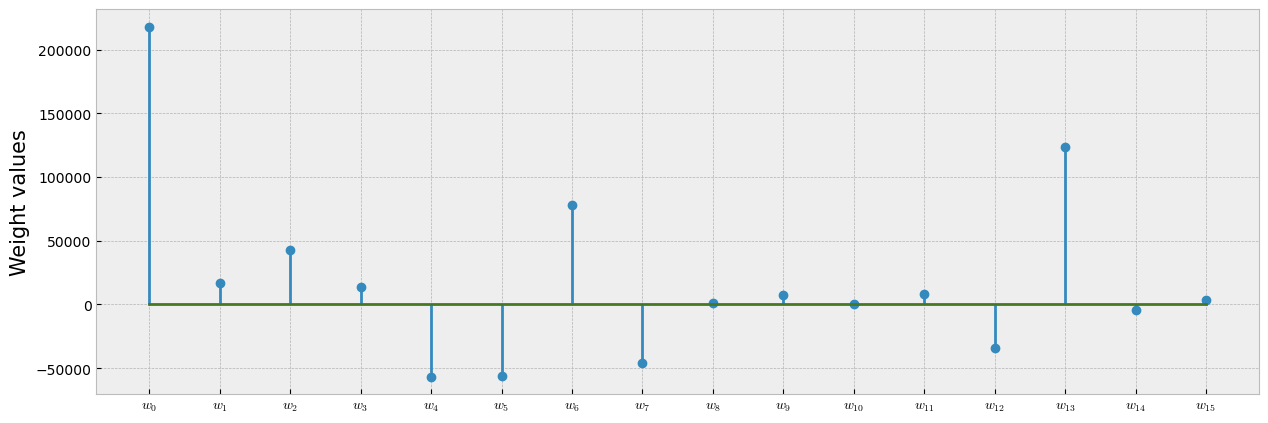

In [ ]:
plt.figure(figsize=(15,5))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);

Alternatively, you can create a single pipeline to include preprocessing and the ML algorithm:

In [ ]:
## construct pipeline to include data preparation and predictive modeling


model = Pipeline([('preprocess', preprocessing),
                 ('lin_reg', LinearRegression())])

model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('lin_reg', LinearRegression())])

In [ ]:
# training the model
model.fit(X_train, t_train)

model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('lin_reg', LinearRegression())])

In [ ]:
# Making predictions

y_train = model.predict(X_train)

y_train.shape

(16512,)

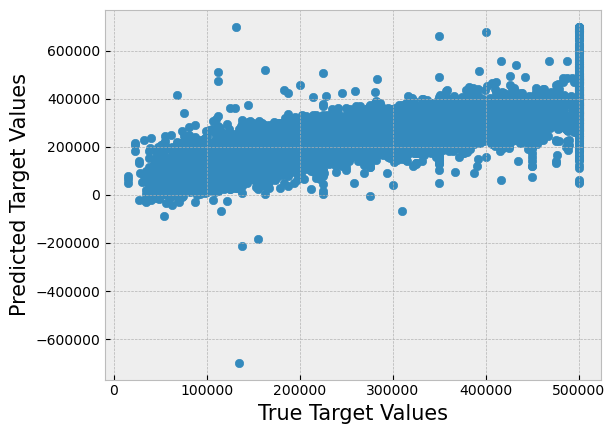

In [ ]:
plt.scatter(t_train, y_train)
plt.xlabel('True Target Values', size=15)
plt.ylabel('Predicted Target Values', size=15);

We should summarize this information using quantitative performance measures. Examples include:

* Coefficient of determination ($r^2$) of the quantile-quantile (Q-Q) plot,
* Root Mean Squared Error (RMSE),
* Root Mean Absolute Error (RMAE),
* and others...

### Other Performance Measures - In Practice

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

---

```Scikit-Learn```'s API documentation offers a few performance measures for regression tasks: [https://scikit-learn.org/stable/modules/classes.html#regression-metrics](https://scikit-learn.org/stable/modules/classes.html#regression-metrics).

In [ ]:
from sklearn.metrics import mean_squared_error 

mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)

RMSE Training Set:  68160.92435491859


This is clearly not a good score. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. 

The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. 

This model is not regularized, which rules out the last option. You could try to add more features but let's start with a more complex model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

model2 = Pipeline([('preprocess', preprocessing),
                 ('tree', DecisionTreeRegressor())])

model2.fit(X_train, t_train)

y_train = model2.predict(X_train)
y_test = model2.predict(X_test)

In [ ]:
mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)

RMSE Training Set:  0.0


Suspiciously optimistically! 

Since we should not touch the test data until we have finalized model selection, what should we do?

* We need to use part of the training set for training and part of it for model validation. This is known as **cross-validation**.

# Lecture 5 - Mitigating Overfitting with Cross-Validation & Regularization

---

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

housing = pd.read_csv('housing.csv')
# Adding new features
housing['rooms_per_household'] = housing['total_rooms']/housing['households'] 
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms'] 
housing['population_per_household']=housing['population']/housing['households']

In [3]:
income_cat = pd.cut(housing['median_income'], 
                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                    labels=[1, 2, 3, 4, 5])

train_set, test_set, income_cat_train, income_cat_test = train_test_split(housing, income_cat,
                                                                          test_size=0.2,
                                                                          shuffle=True,
                                                                          random_state=42,
                                                                          stratify=income_cat)

In [4]:
t_train = train_set['median_house_value'].copy()
X_train = train_set.drop(labels='median_house_value', axis=1)

t_test = test_set['median_house_value'].copy()
X_test = test_set.drop(labels='median_house_value', axis=1)

In [5]:
num_attribs = np.setdiff1d(X_train.columns, ['ocean_proximity'])
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler())])

preprocessing = ColumnTransformer([('num', num_pipeline, num_attribs), 
                                   ('cat', OneHotEncoder(drop='first'), cat_attribs)]) 

model = Pipeline([('preprocess', preprocessing),
                 ('lin_reg', LinearRegression())])

model.fit(X_train, t_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('lin_reg', LinearRegression())])

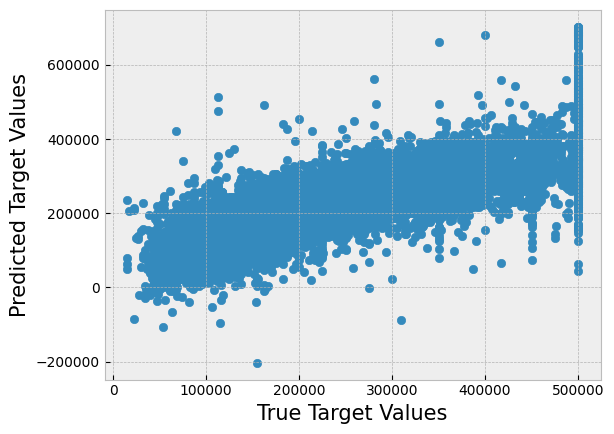

In [6]:
# Making predictions

y_train = model.predict(X_train)

plt.scatter(t_train, y_train)
plt.xlabel('True Target Values', size=15)
plt.ylabel('Predicted Target Values', size=15);

We should summarize this information using quantitative performance measures. Examples include:

* Coefficient of determination ($r^2$) of the quantile-quantile (Q-Q) plot,
* Root Mean Squared Error (RMSE),
* Root Mean Absolute Error (RMAE),
* and others...

### Other Performance Measures - In Practice

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

---

```Scikit-Learn```'s API documentation offers a few performance measures for regression tasks: [https://scikit-learn.org/stable/modules/classes.html#regression-metrics](https://scikit-learn.org/stable/modules/classes.html#regression-metrics).

In [7]:
from sklearn.metrics import mean_squared_error 

mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)

RMSE Training Set:  67269.98114035041


This is clearly not a good score. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. 

The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. 

This model is not regularized, which rules out the last option. You could try to add more features but let's start with a more complex model.

In [8]:
from sklearn.tree import DecisionTreeRegressor 

model2 = Pipeline([('preprocessing', preprocessing),
                  ('tree_reg', DecisionTreeRegressor())])

model2.fit(X_train, t_train)

y_train = model2.predict(X_train)
y_test = model2.predict(X_test)

In [9]:
mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)

RMSE Training Set:  0.0


Suspiciously optimistically! 

Since we should not touch the test data until we have finalized model selection, what should we do?

* We need to use part of the training set for training and part of it for model validation. This is known as **cross-validation**.

---

# Experimental Design

<div class="alert alert-info">
    <b>Experimental Design - How to use your data without cheating</b> 

In experimental design we need data to train (learn) models, and to test how good the models are. The training data needs to be different (disjoint) from the test data. Otherwise we would be testing the learned model on data it had previously seen, and we would get a biased estimate of the model's generalized performance.
    
Most machine learning algorithms require choosing parameter values (**hyperparemeters**); very often this is done by setting aside some of the training data to evaluate the quality of different parameter settings.
</div>

## Cross-Validation

The goal of **cross-validation**, or CV, is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

Cross-validation allows us to determine the values for the hyperparameter that provide the most **generalization**. Cross-validation mitigates the occurrence of **overfitting**, but it does not eliminate it entirely.

Let's consider the **MSE** as our performance measure. There are different strategies for implementing cross-validation:

1. **k-fold cross-validation**. Training set is partitioned into $k$ folds.
2. **Leave-One-Out cross-validation**. Extreme case, where only one sample is left for validation.
3. **Stratified cross-validation**. Data is partition such that each class prior probability is preserved.
4. **$k\times 2$ cross-validation**. Training data is partitioned into 2 sets of equal size $k$ times.

### K-Fold Cross-Validation

The technique of k-fold cross-validation, illustrated below for the case of $k=4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the runs are then averaged.

$K$ is typically 10 or 30. As $K$ increases, the percentage of training instances increases and we get more robust estimators, but the validation set becomes smaller. Furthermore, there is the cost of training the classiﬁer $K$ times, which increases as $K$ is increased. As $N$ increases, $K$ can be smaller; if $N$ is small, $K$ should be large to allow large enough training sets.

The following code randomly splits the training set into 10 distinct subsets called **folds**, then it trains and evaluates the model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. 

The result is an array containing the 10 evaluation scores:

In [11]:
from sklearn.model_selection import cross_val_score, KFold

# cross_val_score?

In [12]:
# Run 10-fold cross-validation for Decision Tree pipeline - ensure reproducibility!

scores = cross_val_score(model2, X_train, t_train,
                         scoring='neg_mean_squared_error',
                         cv = KFold(10,shuffle=True, random_state=41))

scores

array([-5.54676518e+09, -4.70135204e+09, -4.51271140e+09, -5.12693517e+09,
       -4.82039433e+09, -5.59407922e+09, -4.63491489e+09, -5.07172304e+09,
       -5.30386228e+09, -4.97501759e+09])

Find more ```scoring``` metrics in the ```scikit-learn``` API [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [18]:
tree_rmse_scores = np.sqrt(-scores)

tree_rmse_scores

array([74476.6083038 , 68566.40608306, 67176.71772658, 71602.61982134,
       69429.05966544, 74793.57741773, 68080.20924001, 71216.0307627 ,
       72827.620294  , 70533.80460496])

```Scikit-Learn```'s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes ```-scores``` before calculating the square root. 

Let's look at the results:

In [ ]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(tree_rmse_scores)

Scores: [76432.47426693 70166.04547485 70863.10002167 70341.05520023
 70766.40389653 68403.59694509 71451.42052572 72307.67063726
 68943.09879455 73324.19429639]
Mean: 71299.90600592164
Standard deviation: 2193.2430596323525


Let's compute the same scores for the Linear Regression model just to be sure:

In [ ]:
# Run 10-fold cross-validation for Linear Regression pipeline - ensure reproducibility!

lin_scores = cross_val_score(model, X_train, t_train,
                            scoring='neg_mean_squared_error',
                            cv=KFold(10,shuffle=True,random_state=41))

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [67419.68191359 68781.04320737 66156.53490859 68268.3099868
 70828.90160358 69609.43483811 69197.75565508 66761.03602299
 67694.51151757 70196.13010597]
Mean: 68491.33397596519
Standard deviation: 1431.15290545003


Let's try one last model now: the ```RandomForestRegressor```. (We will study this model in detail later on in the course.)

Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called **Ensemble Learning**, and it is often a great way to push ML algorithms even further.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define pipeline
model3 = Pipeline([('preprocess', preprocessing),
                 ('tree', RandomForestRegressor())])

# Train model
model3.fit(X_train, t_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('tree', RandomForestRegressor())])

In [ ]:
# Run 10-fold cross-validation for Random Forest pipeline - ensure reproducibility!

forest_scores = cross_val_score(model3,
                                X_train, 
                                t_train, 
                                scoring='neg_mean_squared_error', 
                                cv=KFold(10,shuffle=True,random_state=41)) 

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [51854.84779056 49012.23035468 50194.89949648 49925.65011924
 51335.0354223  49839.11082276 49479.06946209 50360.09295716
 48783.71028666 51310.83841447]
Mean: 50209.54851264012
Standard deviation: 970.9508540737962


Much better!

But, the score on the training set is still much lower than on the validation sets, meaning that the model is **still overfitting the training set**. 

Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. Before you dive much deeper into Random Forests, however, you should try out many other models from various categories of Machine Learning algorithms (e.g., several Support Vector Machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

---

# Ways to Avoid Overfitting

1. Add more data! - when possible

2. Occam's Razor - select a model with lower complexity

3. Cross-validation - use the training data to fine-tune hyperparameter of the mapper function

4. Regularization - constrains/regularizes the coefficients of the model

---

# Regularization

To illustrate the concept of regularizing a model, let's use a different dataset:

In [19]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''

    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x.reshape(-1,1), t

In [20]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.5 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

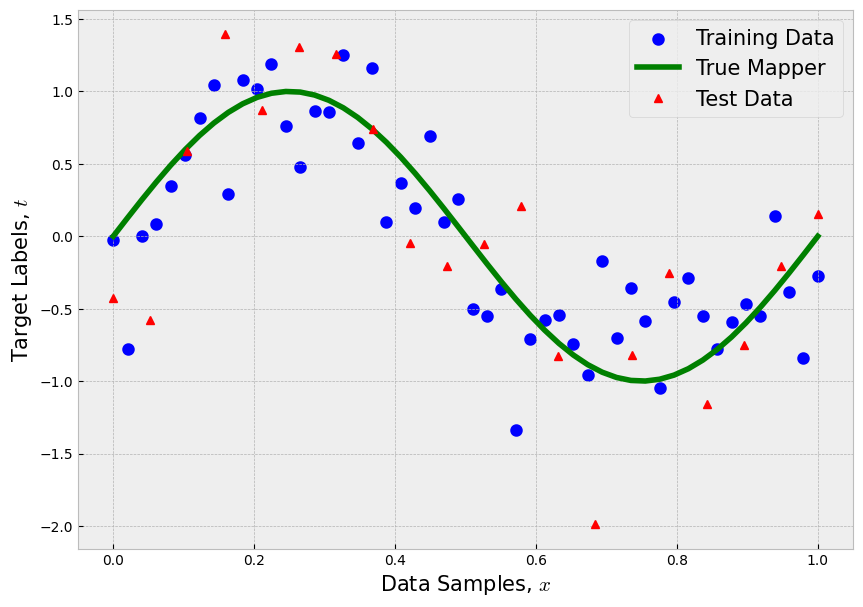

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

The input data in this problem is a single input. We can construct new attributes from this single input. Namely, we will be constructing **polynomial basis functions**.

Let $\{(x_i,t_i)\}_{i=1}^N$ be a set of training data samples, where each sample $x_i$ and target $t_i$ are continuous-valued, i.e. $x_i, t_i \in\mathbb{R}$.

1. **Feature Space:** we can create a *deterministic* set of features with, for example, a polynomial basis function:

\begin{align*}
\phi: \mathbb{R} &\longrightarrow \mathbb{R}^{M+1}\\
x &\longmapsto \begin{bmatrix}\phi_0(x) & \phi_1(x) & \phi_2(x) & \dots &\phi_M(x) \end{bmatrix}^T\\
x &\longmapsto \begin{bmatrix}x^0 &x^1&x^2&\dots&x^M\end{bmatrix}^T
\end{align*}

That is, for every ample $x_i$ in training, we map to the polynomial basis feature space: $\phi(x_i) = \left[1, x_i, x_i^2, \dots, x_i^M\right]^T, \forall i$.

Let $\mathbf{x}$ be the vector containing all training samples, i.e. $\mathbf{x}=\begin{bmatrix}x_1 & x_2 &  x_2 & \dots & x_N\end{bmatrix}^T$. We can build a **feature matrix** (or **data matrix**) of size $N\times (M+1)$ that contains this polynomial feature representation:

\begin{align*}
\mathbf{X} = \begin{bmatrix}\phi_0(\mathbf{x}) & \phi_1(\mathbf{x}) & \phi_2(\mathbf{x}) & \dots & \phi_M(\mathbf{x})\end{bmatrix} = \begin{bmatrix} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{bmatrix} = \begin{bmatrix}1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^M\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^M\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^M
\end{bmatrix}
\end{align*}

So, now, our data is in the expected tabular form as shown in the feature matrix $\mathbf{X}$ above. 

Here is how we could construct it from scratch:

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures?

In [25]:
# Polynomial Model order

M = 3

pol_feat = PolynomialFeatures(degree=M, include_bias=True)

In [ ]:
train_set = pol_feat.fit_transform(x_train) #learns what it needs from the training data

train_set.shape

(50, 4)

In [27]:
# Visualize feature matrix

data = pd.DataFrame(train_set,
                   columns=['x^'+str(i) for i in range(M+1)])

data.head()

x^0       x^1       x^2       x^3
0  1.0  0.000000  0.000000  0.000000
1  1.0  0.020408  0.000416  0.000008
2  1.0  0.040816  0.001666  0.000068
3  1.0  0.061224  0.003748  0.000229
4  1.0  0.081633  0.006664  0.000544

Now, let's fit a linear regression model, which is just a linear combination of these polynomial features:

2. **Mapper**: a linear combination of features weighted by a set of parameters $\mathbf{w}=\left[w_0, w_1, w_2,\dots, w_M\right]^T$, taking the form

$$y = f(\phi(x),\mathbf{w}) = \sum_{j=0}^{M} w_j\phi_j(x)$$

or, in matrix form,

$$y = f(\phi(x),\mathbf{w}) = \mathbf{X}\mathbf{w}$$

3. **Objective Function**: function that assesses the *quality* of the output of the model, for example, an error-based function such as L2-norm of the error or the mean-squared error (MSE) function:

$$J(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \left(t_n - f(\phi(x_n),\mathbf{w})\right)^2 = \frac{1}{2}\left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2$$

4. **Learning Algorithm**: an algorithm that solves or searches for the *optimal* values of the parameters $\mathbf{w}$ that optimize the objective function. It solves the following optimization problem:

$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$

Because the selected model is linear on the parameters and our objective function is convex, we can solve for a solution analytical without having to resort to search algorithms such as the gradient descent.

Since this is a linear model on the parameters $\mathbf{w}$, and the objective function is a *convex* objective function, we can compute the solution analytically. It looks like: 

\begin{align*}
\mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}
\end{align*}

In [28]:
# Analytical solution (Normal Equations)
# w = (X^TX)-1 X^T t

# w = np.linalg.inv(train_set.T@train_set)@train_set.T@t_train
w = np.linalg.pinv(train_set)@t_train
w

array([ -0.29967721,  10.60148527, -29.42661354,  19.17268636])

Alternatively, we can use ```scikit-learn``` object:

In [29]:
# Define linear regression model

lin_reg = LinearRegression()

In [30]:
# Train the model 

lin_reg.fit(train_set, t_train)

LinearRegression()

In [31]:
lin_reg.intercept_

-0.29967721470713277

In [32]:
lin_reg.coef_

array([  0.        ,  10.60148527, -29.42661354,  19.17268636])

In [33]:
# Stacking coefficients into vector - for manual inferences - not a required step 

w = np.hstack((lin_reg.intercept_, lin_reg.coef_[1:]))

w, w.shape

(array([ -0.29967721,  10.60148527, -29.42661354,  19.17268636]), (4,))

Now that we have trained the parameters, we can use it to make predictions in both training and test sets.

In [34]:
# Manual inferences
# y = X*w

train_set@w

array([-0.29967721, -0.09541339,  0.08531626,  0.24348953,  0.38008421,
        0.49607808,  0.59244895,  0.67017459,  0.73023281,  0.77360139,
        0.80125812,  0.8141808 ,  0.81334721,  0.79973515,  0.7743224 ,
        0.73808676,  0.69200602,  0.63705797,  0.5742204 ,  0.5044711 ,
        0.42878787,  0.34814848,  0.26353074,  0.17591243,  0.08627135,
       -0.00441471, -0.09516797, -0.18501063, -0.2729649 , -0.35805299,
       -0.43929711, -0.51571947, -0.58634227, -0.65018774, -0.70627807,
       -0.75363547, -0.79128216, -0.81824034, -0.83353222, -0.83618002,
       -0.82520594, -0.79963218, -0.75848097, -0.7007745 , -0.62553499,
       -0.53178464, -0.41854568, -0.28484029, -0.1296907 ,  0.04788088])

Equivalently, we can call the ```transform``` method to compute the model predictions:

In [35]:
# Inference using scikit-learn model 

y_train = lin_reg.predict(train_set)

y_train

array([-0.29967721, -0.09541339,  0.08531626,  0.24348953,  0.38008421,
        0.49607808,  0.59244895,  0.67017459,  0.73023281,  0.77360139,
        0.80125812,  0.8141808 ,  0.81334721,  0.79973515,  0.7743224 ,
        0.73808676,  0.69200602,  0.63705797,  0.5742204 ,  0.5044711 ,
        0.42878787,  0.34814848,  0.26353074,  0.17591243,  0.08627135,
       -0.00441471, -0.09516797, -0.18501063, -0.2729649 , -0.35805299,
       -0.43929711, -0.51571947, -0.58634227, -0.65018774, -0.70627807,
       -0.75363547, -0.79128216, -0.81824034, -0.83353222, -0.83618002,
       -0.82520594, -0.79963218, -0.75848097, -0.7007745 , -0.62553499,
       -0.53178464, -0.41854568, -0.28484029, -0.1296907 ,  0.04788088])

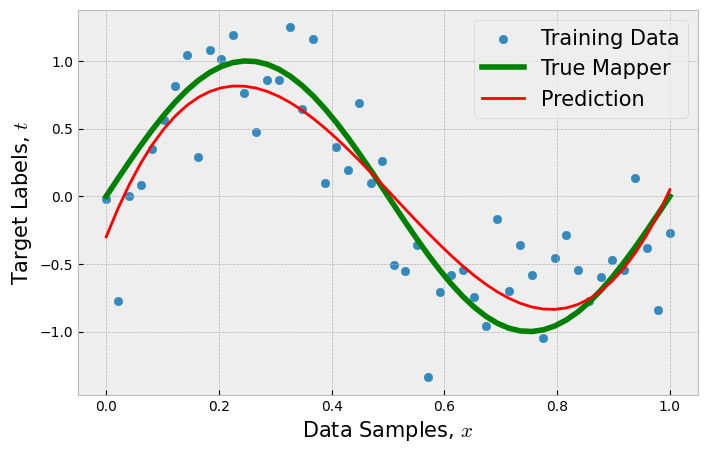

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, t_train, label='Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_train, y_train, c='r', label='Prediction')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

Using ```scikit-learn``` pipelines:

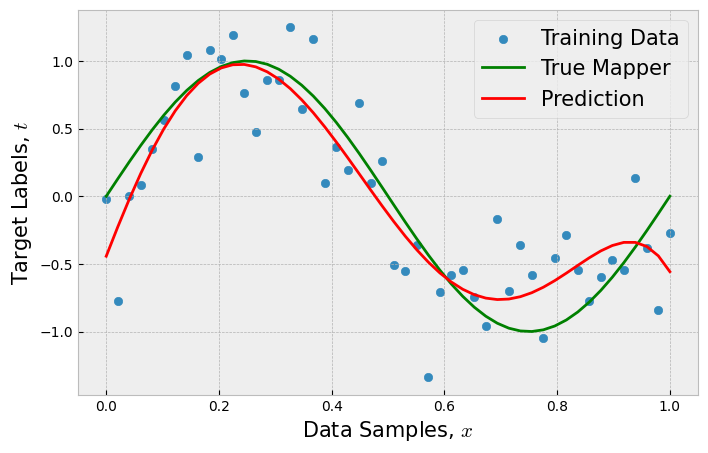

In [40]:
# Construct pipeline: Linear Regression with polynomial features
M =5
poly_reg = Pipeline([('poly_feat', PolynomialFeatures(degree=M)),
                    ('lin_reg', LinearRegression())])

# Train it
poly_reg.fit(x_train, t_train)

# Make predictions
y_train = poly_reg.predict(x_train)

# Plot results
plt.figure(figsize=(8,5))
plt.scatter(x_train, t_train, label='Training Data')
plt.plot(x_true, t_true, 'g', label = 'True Mapper')
plt.plot(x_train, y_train, c='r', label='Prediction')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

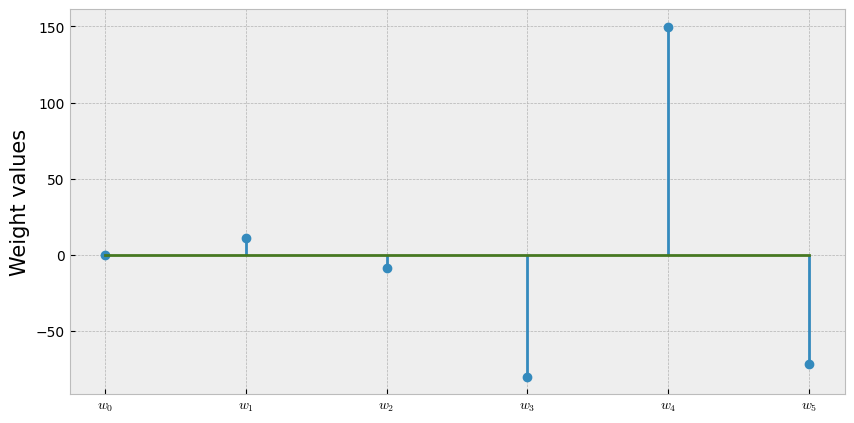

In [41]:
# Parameters w - Visualization only (not required step)
w = np.hstack((poly_reg.named_steps.lin_reg.intercept_,
              poly_reg.named_steps.lin_reg.coef_[1:]))

plt.figure(figsize=(10,5))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);

### Ridge Regularizer

The Ridge regularizer, also known as the L2-Norm regularizer or weight decay, adds a term with the squared sum of the weights scaled by the hyperparameter $\lambda$. 

\begin{align*}
R^{(L2)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M w_i^2 \\
&= \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the objective function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

* The hyperparameter $\lambda$ controls how much you want to regularize the model. If $\lambda$ is 0 then the learning algorithm will just minimize the error term in the cost function. If $\lambda$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

### Lasso Regularizer

The Lasso regularizer, also known as the L1-norm regularizer, it adds a term with the L1-norm of the weight vector $\mathbf{w}$ scaled by the hyperparameter $\lambda$. $\lambda$ here has the same tradeoff responsibility.

\begin{align*}
R^{(L1)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M |w_i| \\
&= \lambda \Vert\mathbf{w}\Vert_1
\end{align*}

* An important characteristic of the Lasso regularizer is that it tends to eliminate the weights of the least important features by setting them to zero. This is known as **sparsity**.

### Elastic Net Regularizer

Elastic Net is a middle ground between Ridge and Lasso. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio with the hyperparameter $\beta$.

\begin{align*}
R^{(L12)}_{\mathbf{w}} &= \beta\lambda \sum_{i=0}^M |w_i| + (1-\beta) \lambda \sum_{i=0}^M w_i^2 \\
&= \beta R^{(L1)}_{\mathbf{w}} + (1-\beta) R^{(L2)}_{\mathbf{w}}
\end{align*}

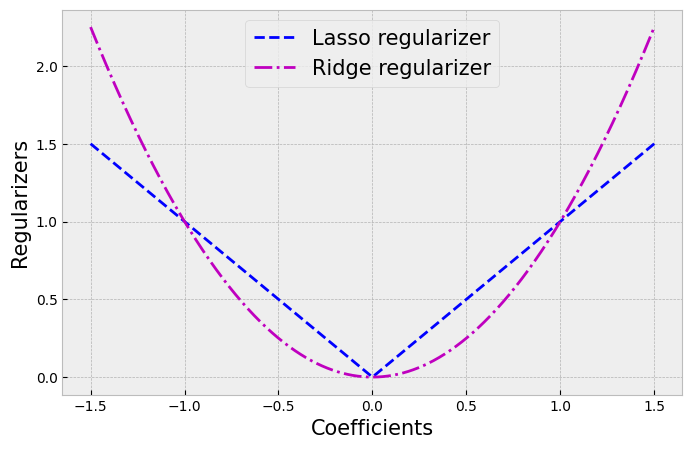

In [42]:
def Regularizers(w,beta=0.5):
    L1 = np.abs(w)
    L2 = w**2
    Elastic = beta*np.abs(w) + (1-beta)*w**2
    return L1, L2, Elastic

x = np.linspace(-1.5,1.5,1000)
L1,L2,Elastic=Regularizers(x)

plt.figure(figsize=(8,5))
plt.plot(x,L1, 'b--', label = 'Lasso regularizer')
plt.plot(x,L2, 'm-.', label = 'Ridge regularizer')
# plt.plot(x,Elastic, 'g-', label = 'Elastic Net regularizer')
plt.xlabel('Coefficients',size=15)
plt.ylabel('Regularizers',size=15); plt.legend(fontsize=15);

#### Observations

* Ridge regularizer:
    * forces parameter values to be small but not equal to zero
    * is highly affected by outliers

* Lasso regularizer:
    * promotes sparsity, i.e. forces some parameter values to be exactly equal to zero
    * it is not as affected by outliers
    
* Elastic Net regularizer:
    * requires fine-tuning of an extra hyperparameter

#### Examples

* Consider $\mathbf{w}=[0.5,0.5,1]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0.5^2+0.5^2+1^2 = 1.5$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0.5+0.5+1=2$. Thus, for this set of coefficients, the lasso regularizer will apply a stronger penalty (larger value).

* Consider $\mathbf{w}=[0,0,2]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0^2+0^2+2^2 = 4$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0+0+2=2$. Thus, for this set of coefficients, the ridge regularizer will apply a stronger penalty (larger value).

#### Which one to choose?

Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

<div class="alert alert-info">
    <b>Ridge Regression</b> 

Let $\{(x_i,t_i)\}_{i=1}^N$ be the set of training data, where $x_i$ are the training samples and $t_i$ their associated target/desired value. Consider the linear regression model: $\mathbf{y} = \mathbf{X}\mathbf{w}$, where $\mathbf{X}$ is the feature matrix of size $N\times(M+1)$.

The Ridge Regression objective function penalizes the weights with the L2-norm:

\begin{align*}
J(\mathbf{w}) &= \Vert\mathbf{t}-\mathbf{X}\mathbf{w}\Vert_2^2 + \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

Our goal is to find $\mathbf{w}$ that minimizes the objective function $J(\mathbf{w})$, that is:
    
\begin{align*}
\arg_{\mathbf{w}}\min J(\mathbf{w})
\end{align*}
    
The solution is in closed-form before we are dealing with a linear model and a quadratic objective function:

\begin{align*}
\mathbf{w} = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{t}
\end{align*}

where $\mathbf{I}$ is an identity matrix of size $(M+1)\times (M+1)$. As you can see, we first **diagonally-load** the square matrix $\mathbf{X}^T\mathbf{X}$ before inverting it.

</div>

In [43]:
from sklearn.linear_model import Ridge

# Ridge?

In [55]:
M = 15
lam = 0.001

# Construct pipeline: Polynomial Features + Linear Regression w/ Ridge Regularizer
ridge_poly_reg = Pipeline([('poly_feat', PolynomialFeatures(degree=M)),
                          ('ridge_reg', Ridge(alpha=lam))])

# Train it
ridge_poly_reg.fit(x_train, t_train)

# Make predictions
y_train_reg = ridge_poly_reg.predict(x_train)

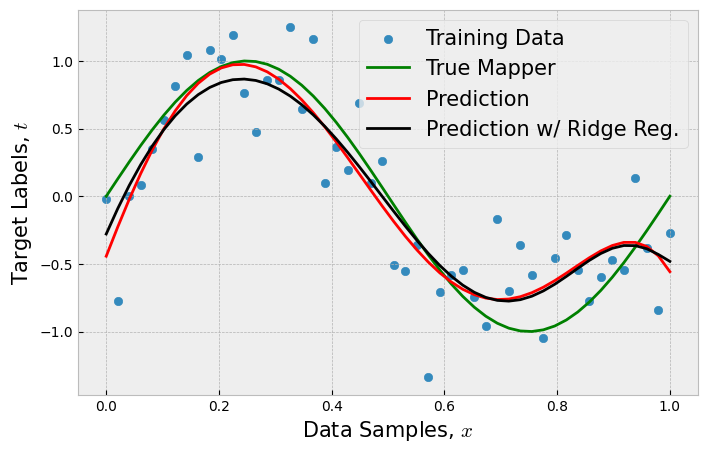

In [56]:
# Plotting results
plt.figure(figsize=(8,5))
plt.scatter(x_train, t_train, label='Training Data')
plt.plot(x_true, t_true, 'g', label = 'True Mapper')
plt.plot(x_train, y_train, c='r', label='Prediction')
plt.plot(x_train, y_train_reg, c='k', label='Prediction w/ Ridge Reg.')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

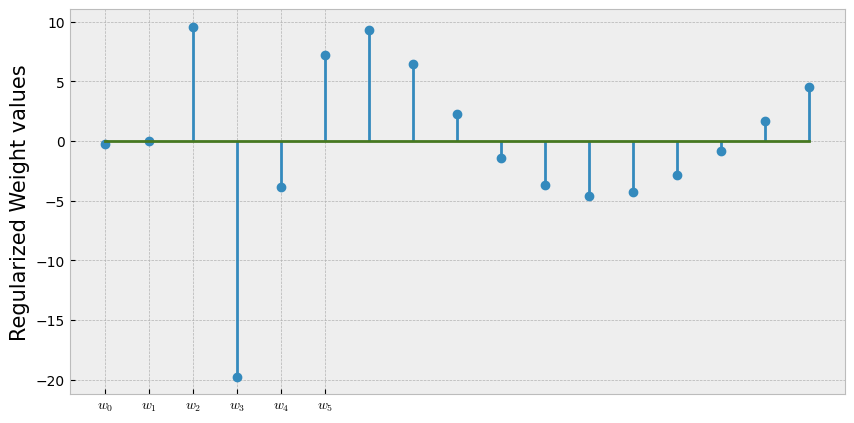

In [57]:
w_reg = np.hstack((ridge_poly_reg.named_steps.ridge_reg.intercept_,
                  ridge_poly_reg.named_steps.ridge_reg.coef_))

plt.figure(figsize=(10,5))
plt.stem(w_reg)
plt.ylabel('Regularized Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);